<h1 style="color:red"><b>Disclaimer of Liability</b></h1>

**The material and information contained on this website is for general information, reference, and self-learning purposes only. You should not rely upon the material or information on the website as a basis for making any academic, business, legal or any other decisions. You should not copy any material or information on the website into any of your academic, business, legal or any other non-private usages. ZHANG Wengyu will not be responsible for any consequences due to your violations.**


Whilst ZHANG Wengyu endeavours to keep the information up to date and correct, ZHANG Wengyu makes no representations or warranties of any kind, express or implied about the completeness, accuracy, reliability, suitability or availability with respect to the website or the information, products, services or related graphics contained on the website for any purpose. Any reliance you place on such material is therefore strictly at your own risk.


ZHANG Wengyu will not be liable for any false, inaccurate, inappropriate or incomplete information presented on the website.


Although every effort is made to keep the website up and running smoothly, due to the nature of the Internet and the technology involved, ZHANG Wengyu takes no responsibility for and will not be liable for the website being temporarily unavailable due to technical issues (or otherwise) beyond its control or for any loss or damage suffered as a result of the use of or access to, or inability to use or access this website whatsoever.


Certain links in this website will lead to websites which are not under the control of ZHANG Wengyu. When you activate these you will leave ZHANG Wengyu's  website. ZHANG Wengyu has no control over and accepts no liability in respect of materials, products or services available on any website which is not under the control of ZHANG Wengyu.


To the extent not prohibited by law, in no circumstances shall ZHANG Wengyu be liable to you or any other third parties for any loss or damage (including, without limitation, damage for loss of business or loss of profits) arising directly or indirectly from your use of or inability to use, this site or any of the material contained in it.

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import Lasso
from sklearn.manifold import TSNE
import seaborn as sns

import numpy as np

from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, RFE

import plotly.graph_objs as go
import plotly.offline as py

import eli5

from apyori import apriori

import warnings
warnings.filterwarnings('ignore')

In [68]:
random_state = 42

In [69]:
train = pd.read_csv('./dataset/dont-overfit-ii/train.csv')
test = pd.read_csv('./dataset/dont-overfit-ii/test.csv')

In [70]:
y = train['target'] 
X = train.drop(["id" ,'target'], axis=1)

test = test.drop(["id"],axis=1)

# 1. EDA

In [77]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Columns: 300 entries, 0 to 299
dtypes: float64(300)
memory usage: 586.1 KB


In [78]:
train.isnull().sum()

id        0
target    0
0         0
1         0
2         0
         ..
295       0
296       0
297       0
298       0
299       0
Length: 302, dtype: int64

In [79]:
train.duplicated().sum()

0

In [80]:
train.describe()

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,...,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,124.500000,0.640000,0.023292,-0.026872,0.167404,0.001904,0.001588,-0.007304,0.032052,0.078412,...,0.044652,0.126344,0.018436,-0.012092,-0.065720,-0.106112,0.046472,0.006452,0.009372,-0.128952
std,72.312977,0.480963,0.998354,1.009314,1.021709,1.011751,1.035411,0.955700,1.006657,0.939731,...,1.011416,0.972567,0.954229,0.960630,1.057414,1.038389,0.967661,0.998984,1.008099,0.971219
min,0.000000,0.000000,-2.319000,-2.931000,-2.477000,-2.359000,-2.566000,-2.845000,-2.976000,-3.444000,...,-2.804000,-2.443000,-2.757000,-2.466000,-3.287000,-3.072000,-2.634000,-2.776000,-3.211000,-3.500000
25%,62.250000,0.000000,-0.644750,-0.739750,-0.425250,-0.686500,-0.659000,-0.643750,-0.675000,-0.550750,...,-0.617000,-0.510500,-0.535750,-0.657000,-0.818500,-0.821000,-0.605500,-0.751250,-0.550000,-0.754250
50%,124.500000,1.000000,-0.015500,0.057000,0.184000,-0.016500,-0.023000,0.037500,0.060500,0.183500,...,0.067500,0.091000,0.057500,-0.021000,-0.009000,-0.079500,0.009500,0.005500,-0.009000,-0.132500
75%,186.750000,1.000000,0.677000,0.620750,0.805000,0.720000,0.735000,0.660500,0.783250,0.766250,...,0.797250,0.804250,0.631500,0.650250,0.739500,0.493000,0.683000,0.794250,0.654250,0.503250
max,249.000000,1.000000,2.567000,2.419000,3.392000,2.771000,2.901000,2.793000,2.546000,2.846000,...,2.865000,2.801000,2.736000,2.596000,2.226000,3.131000,3.236000,2.626000,3.530000,2.771000


,target,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
target,1.000000,0.108966,-0.073319,-0.015141,0.011549,-0.114726,-0.050329,-0.057063,0.004239,-0.048443,...,0.039675,0.055694,-0.088930,-0.034363,-0.031964,-0.170501,0.007434,0.056810,-0.134760,-0.075475
0,0.108966,1.000000,-0.003871,-0.010487,-0.047819,0.013967,0.070091,-0.022537,0.002832,-0.060031,...,-0.023230,0.053416,-0.143668,-0.007530,-0.060824,-0.024839,-0.051288,0.029143,0.065951,0.038523
1,-0.073319,-0.003871,1.000000,0.013573,-0.018884,0.086743,-0.028023,-0.032914,-0.066416,-0.027201,...,-0.006300,-0.077365,-0.021583,-0.054171,-0.046174,0.042820,-0.127499,0.065883,0.055470,-0.056612
2,-0.015141,-0.010487,0.013573,1.000000,-0.031620,0.088980,-0.050191,0.024674,0.035260,-0.000094,...,-0.111172,-0.027842,-0.013653,-0.009691,-0.051292,-0.028690,-0.071835,0.069395,0.083946,0.025507
3,0.011549,-0.047819,-0.018884,-0.031620,1.000000,0.025255,0.172058,0.157954,-0.018158,0.058736,...,-0.114505,0.029415,0.129069,0.096159,-0.027793,-0.005016,0.034551,0.089963,-0.066438,-0.010770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,-0.170501,-0.024839,0.042820,-0.028690,-0.005016,-0.050318,0.026868,-0.023192,0.032648,0.017297,...,-0.030738,-0.020251,0.015083,-0.139025,-0.015920,1.000000,-0.072721,-0.036572,-0.034341,0.097052
296,0.007434,-0.051288,-0.127499,-0.071835,0.034551,-0.030017,0.070294,0.036903,-0.006235,-0.071254,...,0.016047,0.042079,-0.045879,-0.011766,0.125693,-0.072721,1.000000,-0.002007,0.056297,0.040264
297,0.056810,0.029143,0.065883,0.069395,0.089963,0.029747,0.069243,0.037912,0.014628,0.009224,...,0.048496,0.066474,-0.025382,0.021148,-0.103255,-0.036572,-0.002007,1.000000,0.039793,-0.141078
298,-0.134760,0.065951,0.055470,0.083946,-0.066438,-0.008517,-0.048009,0.171640,-0.031094,-0.000516,...,-0.125556,0.087400,0.008096,-0.005422,-0.063242,-0.034341,0.056297,0.039793,1.000000,-0.092017


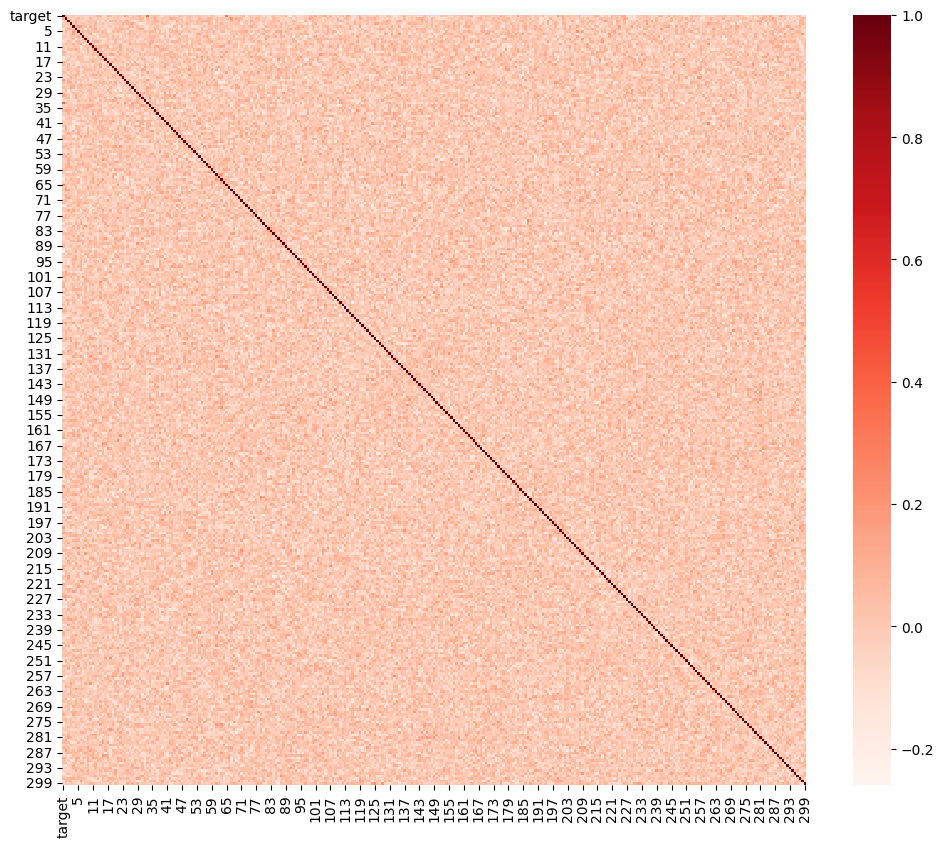

In [147]:
train_temp = train.drop(['id'], axis=1)
display(train_temp.corr())

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(train_temp.corr(), ax=ax,  cmap='Reds')
plt.show()

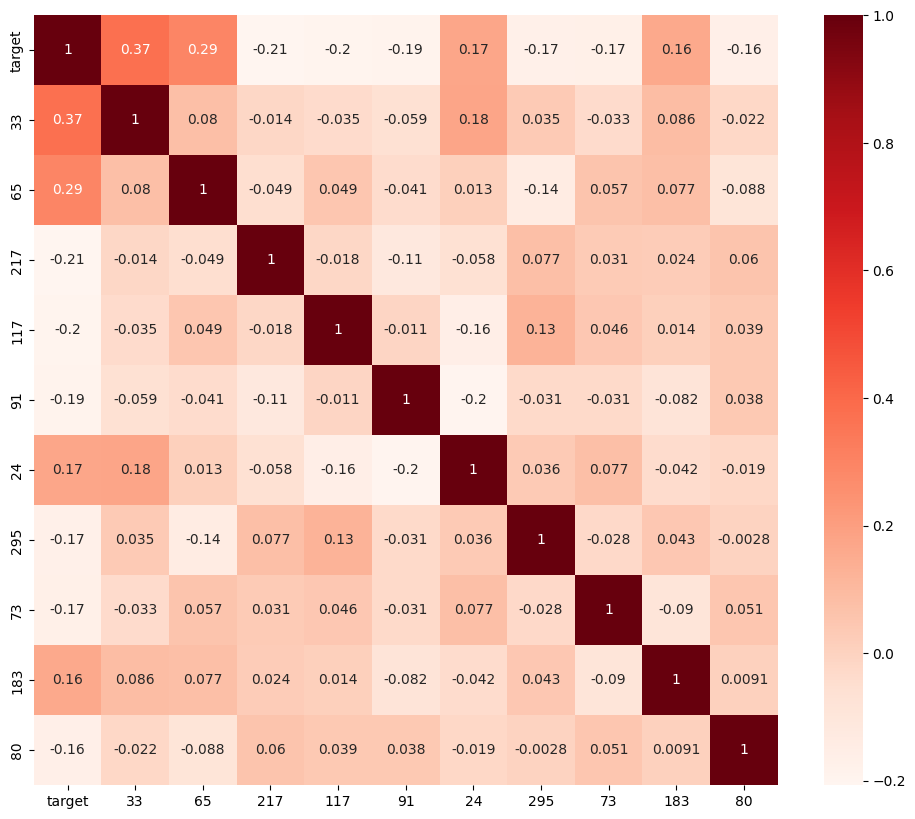

In [150]:
corr_matrix = train_temp.corr()
target_corr = corr_matrix['target'].abs().sort_values(ascending=False)
top_10_features = target_corr.head(11).index
top_corr_matrix = train_temp[top_10_features].corr()

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(top_corr_matrix, ax=ax, annot=True, cmap='Reds')
plt.show()

target
1.0    160
0.0     90
Name: count, dtype: int64


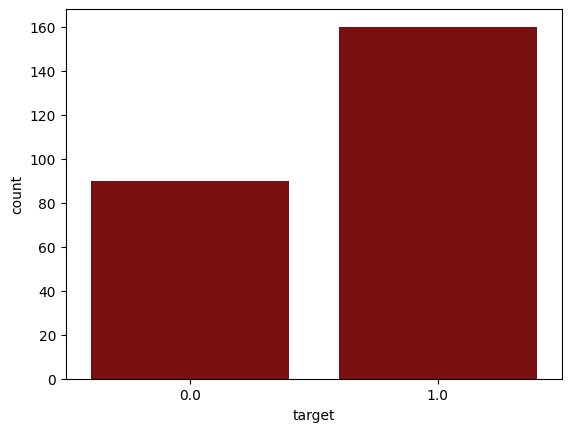

In [24]:
x = (train.target.value_counts())
print(x)
p = sns.countplot(data=train, x="target", color="darkred")
plt.show()

## 1. t-SNE

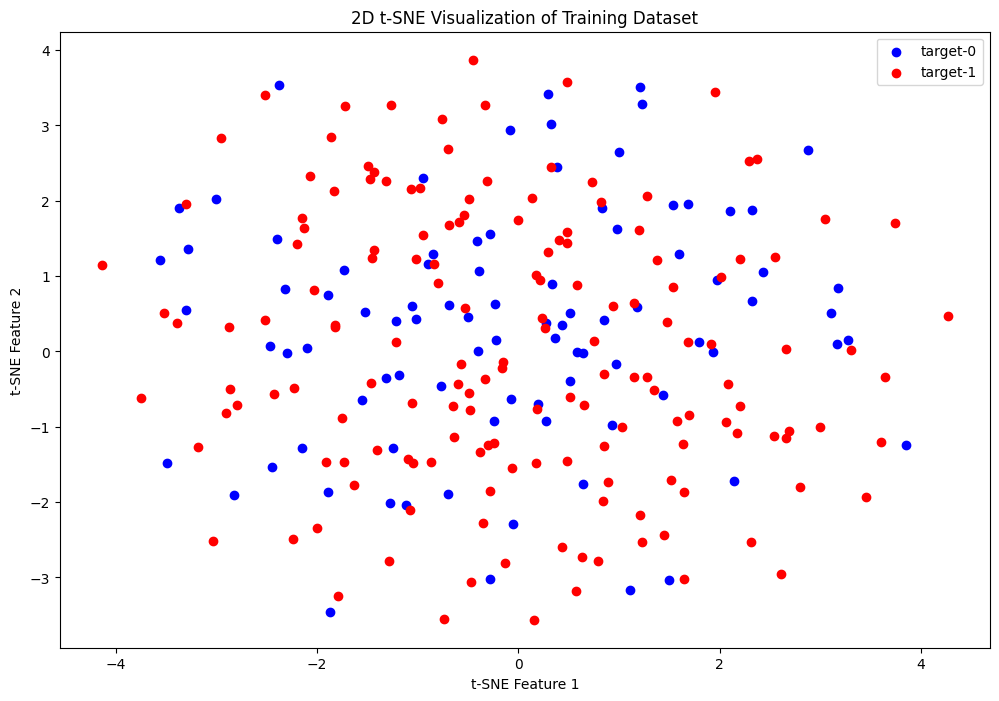

In [120]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(12, 8))

colors = ['blue', 'red']
labels = ['target-0', 'target-1']

for i in range(2):
    indices = (y == i)
    plt.scatter(X_tsne[indices, 0], X_tsne[indices, 1], c=colors[i], label=labels[i])

plt.title('2D t-SNE Visualization of Training Dataset')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.legend()
plt.show()

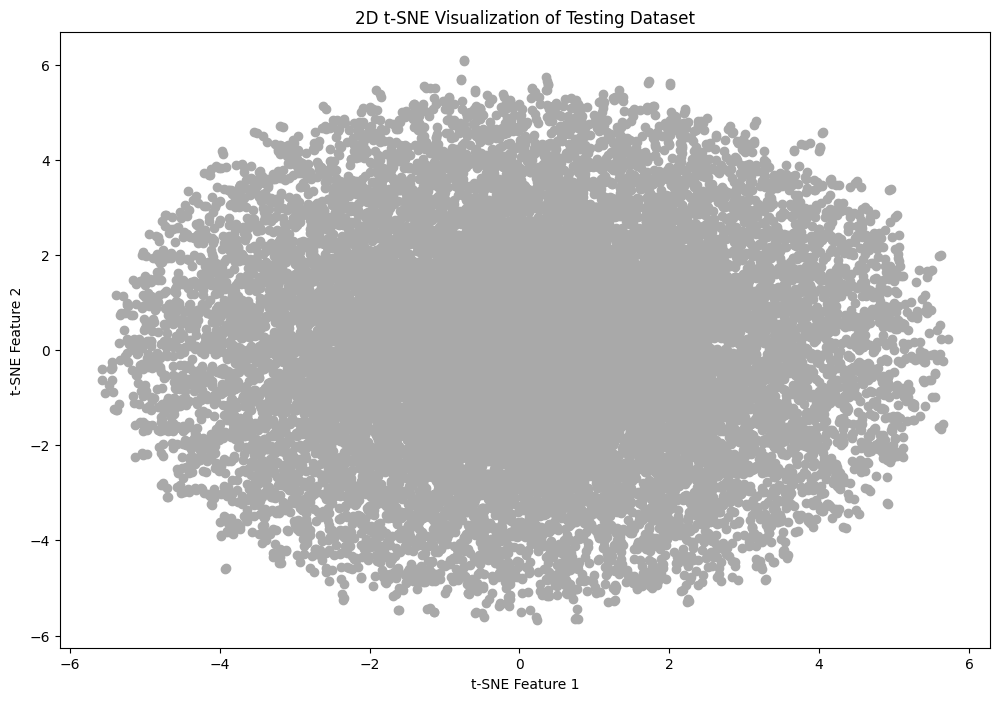

In [122]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(test)

plt.figure(figsize=(12, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], color='darkgrey')
plt.title('2D t-SNE Visualization of Testing Dataset')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.show()

Distributions of randomly selected 18 columns


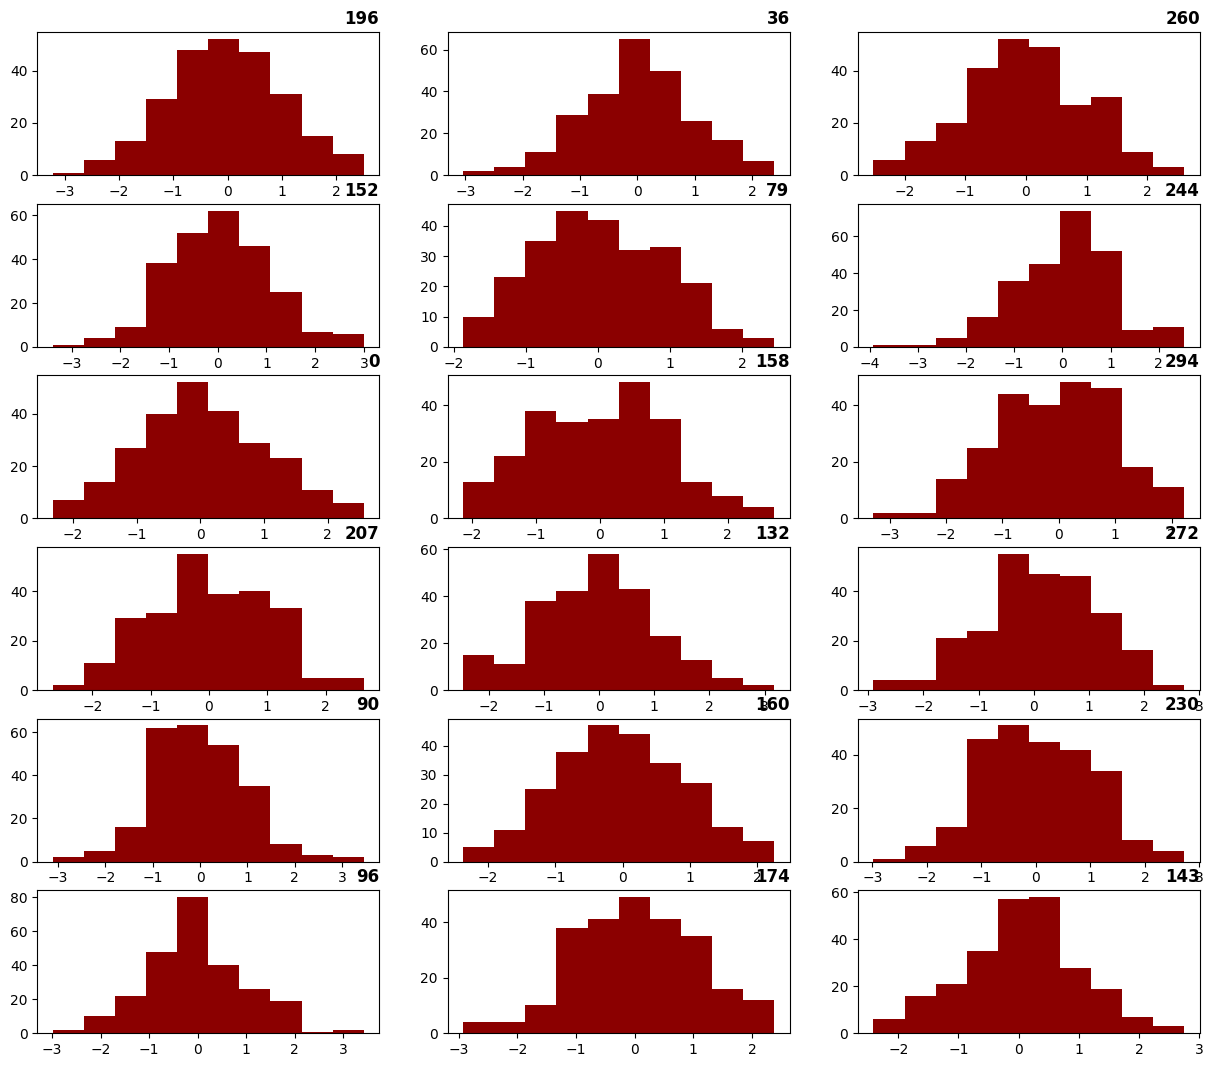

In [98]:
print('Distributions of randomly selected 18 columns')
plt.figure(figsize=(15, 13))

random_col = np.random.choice(list(X.columns), 18)

for i, col in enumerate(random_col):
    plt.subplot(6, 3, i + 1)
    plt.hist(X[col], color='darkred')
    plt.title(col, loc='right', fontsize=12, fontweight='bold')

Distributions of randomly selected 18 rows


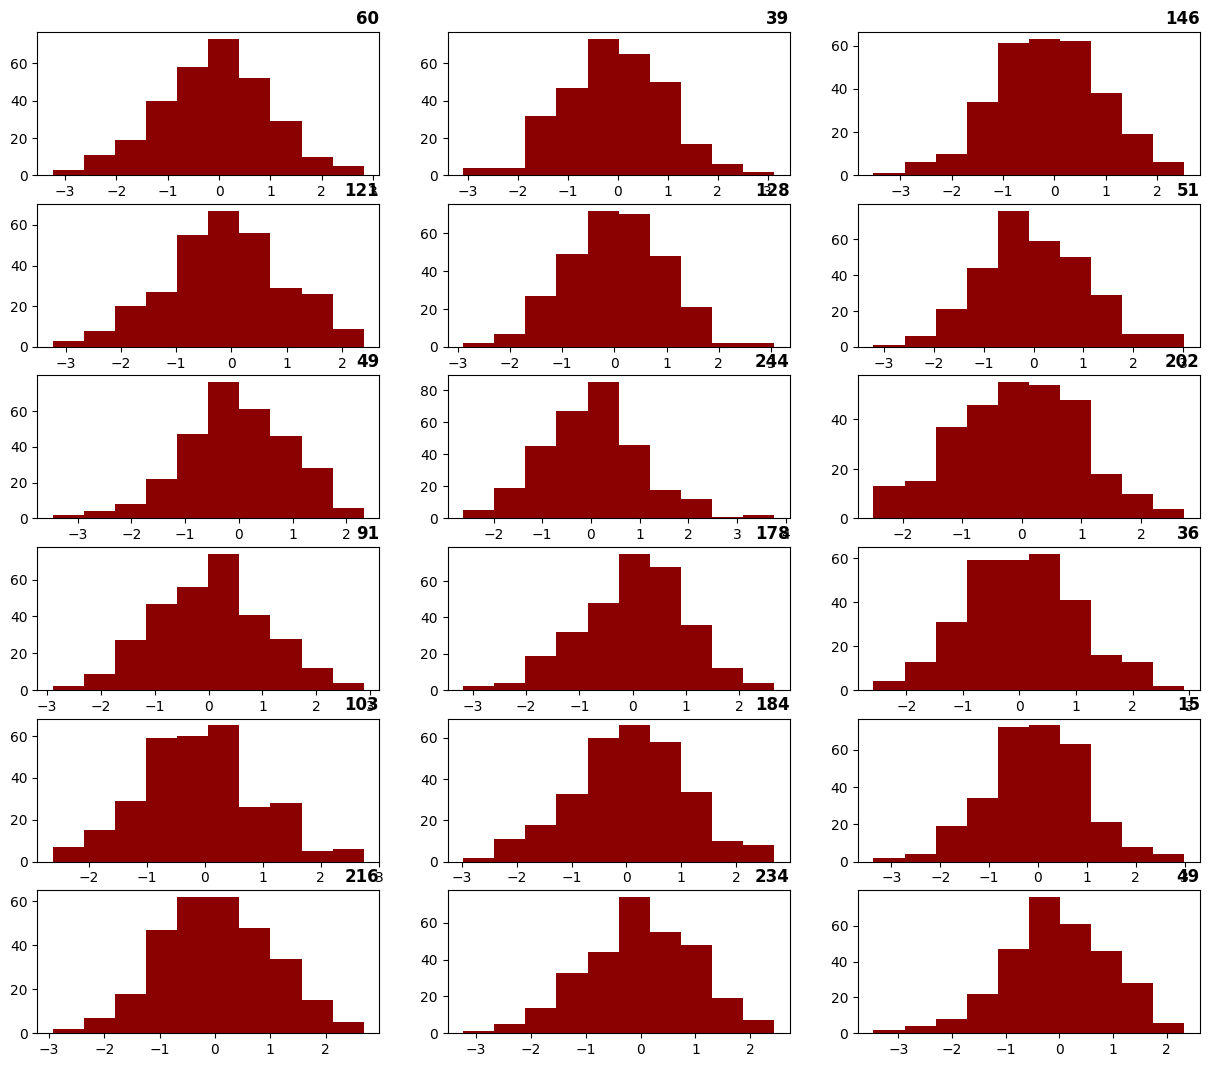

In [99]:
print('Distributions of randomly selected 18 rows')
plt.figure(figsize=(15, 13))

# randomly select 30 rows
random_rows = np.random.choice(X.index, 18)

for i, col in enumerate(random_rows):
    plt.subplot(6, 3, i + 1)
    plt.hist(X.iloc[col], color='darkred')
    plt.title(col, loc='right', fontsize=12, fontweight='bold')


# 2. FE

references:  
https://www.kaggle.com/code/artgor/how-to-not-overfit/

In [71]:
# K-Folds cross-validator
n_fold = 20
folds = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=42)
repeated_folds = RepeatedStratifiedKFold(n_splits=20, n_repeats=20, random_state=42)

def train_model(X, X_test, y, params, folds=folds, model_type='sklearn', model=None):
    prediction = np.zeros(len(X_test))
    roc_auc_scores = []
    for fold_n, (train_index, valid_index) in enumerate(folds.split(X, y)):
        X_train, X_valid = X[train_index], X[valid_index]
        y_train, y_valid = y[train_index], y[valid_index]            
            
        if model_type == 'sklearn':
            model = model
            model.fit(X_train, y_train)
            y_pred_valid = model.predict(X_valid).reshape(-1,)
            y_pred = model.predict_proba(X_test)[:, 1]
        # lasso
        if model_type == 'lasso':
            model = model
            model.fit(X_train, y_train)
            y_pred_valid = model.predict(X_valid).reshape(-1,)
            y_pred = model.predict(X_test)        
        roc_auc_scores.append(roc_auc_score(y_valid, y_pred_valid))

        prediction += y_pred

    prediction /= n_fold
    
    print('CV mean roc_auc_scores: {0:.4f}, std: {1:.4f}.'.format(np.mean(roc_auc_scores), np.std(roc_auc_scores)))

    return prediction, roc_auc_scores

## Baseline FE

In [44]:
standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(X)
test = standard_scaler.transform(test)

X_train = X
y_train = y
X_test = test

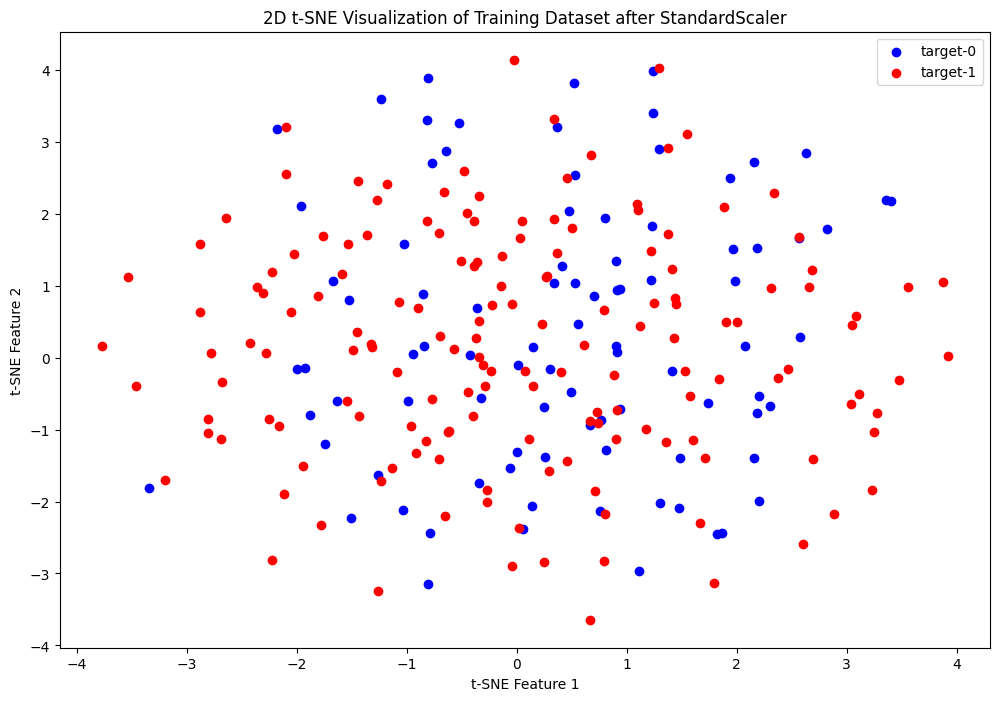

In [160]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train)

plt.figure(figsize=(12, 8))

colors = ['blue', 'red']
labels = ['target-0', 'target-1']

for i in range(2):
    indices = (y == i)
    plt.scatter(X_tsne[indices, 0], X_tsne[indices, 1], c=colors[i], label=labels[i])

plt.title('2D t-SNE Visualization of Training Dataset after StandardScaler')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


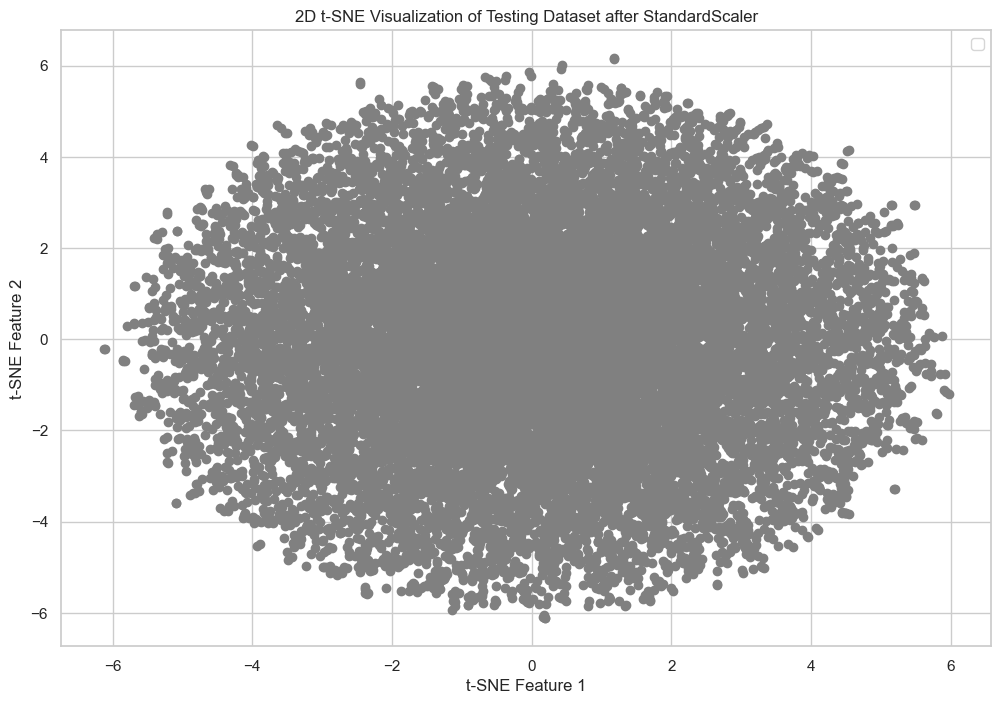

In [45]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_test)

plt.figure(figsize=(12, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c='grey')
plt.title('2D t-SNE Visualization of Testing Dataset after StandardScaler')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.legend()
plt.show()

## SMOTE

In [32]:
train = pd.read_csv('./dataset/dont-overfit-ii/train.csv')
test = pd.read_csv('./dataset/dont-overfit-ii/test.csv')

y = train['target'] 
X = train.drop(["id" ,'target'], axis=1)
test = test.drop(["id"],axis=1)
X_test = test

standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(X)
test = standard_scaler.transform(test)

# SMOTE
smote = SMOTE(sampling_strategy='minority')
X_train, y_train = smote.fit_resample(X, y)

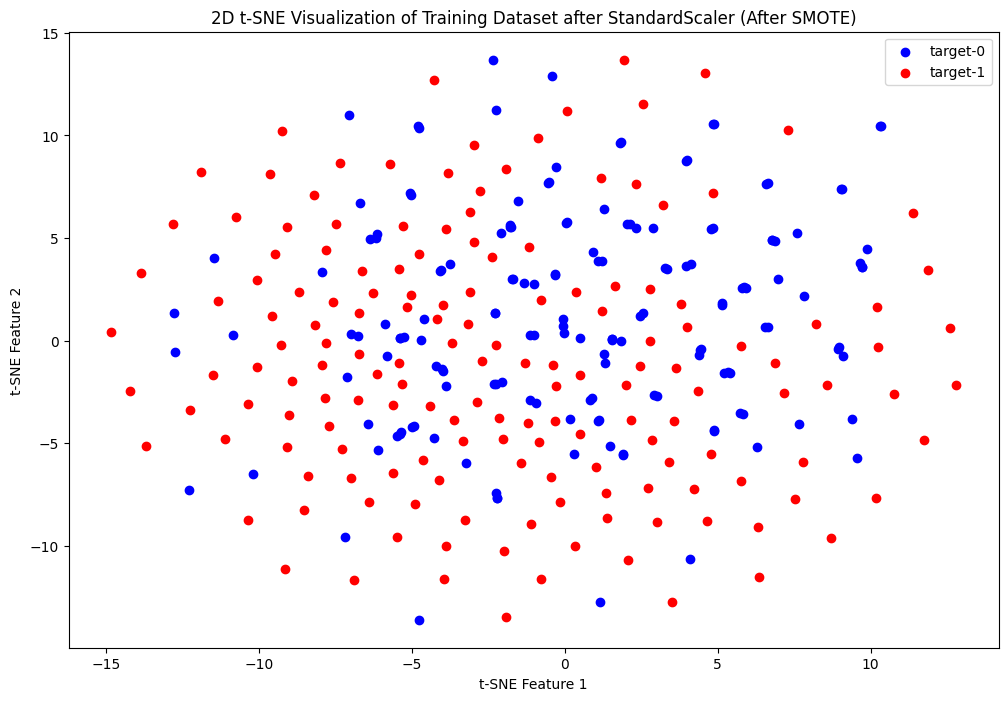

In [33]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train)

plt.figure(figsize=(12, 8))

colors = ['blue', 'red']
labels = ['target-0', 'target-1']

for i in range(2):
    indices = (y_train == i)
    plt.scatter(X_tsne[indices, 0], X_tsne[indices, 1], c=colors[i], label=labels[i])

plt.title('2D t-SNE Visualization of Training Dataset after StandardScaler (After SMOTE)')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.legend()
plt.show()

# 3. Feature Creation

## 1. Adding std

In [36]:
train = pd.read_csv('./dataset/dont-overfit-ii/train.csv')
test = pd.read_csv('./dataset/dont-overfit-ii/test.csv')

y = train['target'] 
X = train.drop(["id" ,'target'], axis=1)
test = test.drop(["id"],axis=1)
X_train = X
X_test = test
y_train = y

X_train['300'] = X_train.std(1)
X_test['300'] = X_test.std(1)
scaler = StandardScaler()
X_train[X_train.columns[:-1]] = scaler.fit_transform(X_train[X_train.columns[:-1]])
X_test[X_train.columns[:-1]] = scaler.transform(X_test[X_train.columns[:-1]])
X_train = X_train.values
X_test = X_test.values

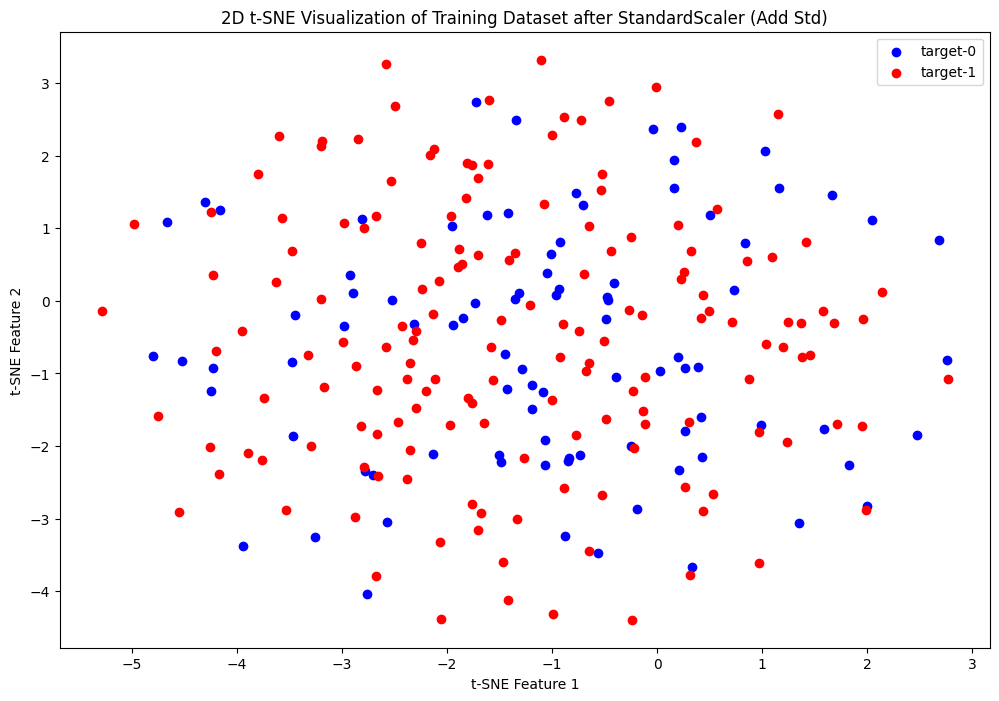

In [37]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train)

plt.figure(figsize=(12, 8))

colors = ['blue', 'red']
labels = ['target-0', 'target-1']

for i in range(2):
    indices = (y == i)
    plt.scatter(X_tsne[indices, 0], X_tsne[indices, 1], c=colors[i], label=labels[i])

plt.title('2D t-SNE Visualization of Training Dataset after StandardScaler (Add Std)')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.legend()
plt.show()

## 1.2 Adding Mean

In [38]:
train = pd.read_csv('./dataset/dont-overfit-ii/train.csv')
test = pd.read_csv('./dataset/dont-overfit-ii/test.csv')

y = train['target'] 
X = train.drop(["id" ,'target'], axis=1)
test = test.drop(["id"],axis=1)
X_train = X
X_test = test
y_train = y

X_train['300'] = X_train.mean(1)
X_test['300'] = X_test.mean(1)
scaler = StandardScaler()
X_train[X_train.columns[:-1]] = scaler.fit_transform(X_train[X_train.columns[:-1]])
X_test[X_train.columns[:-1]] = scaler.transform(X_test[X_train.columns[:-1]])
X_train = X_train.values
X_test = X_test.values

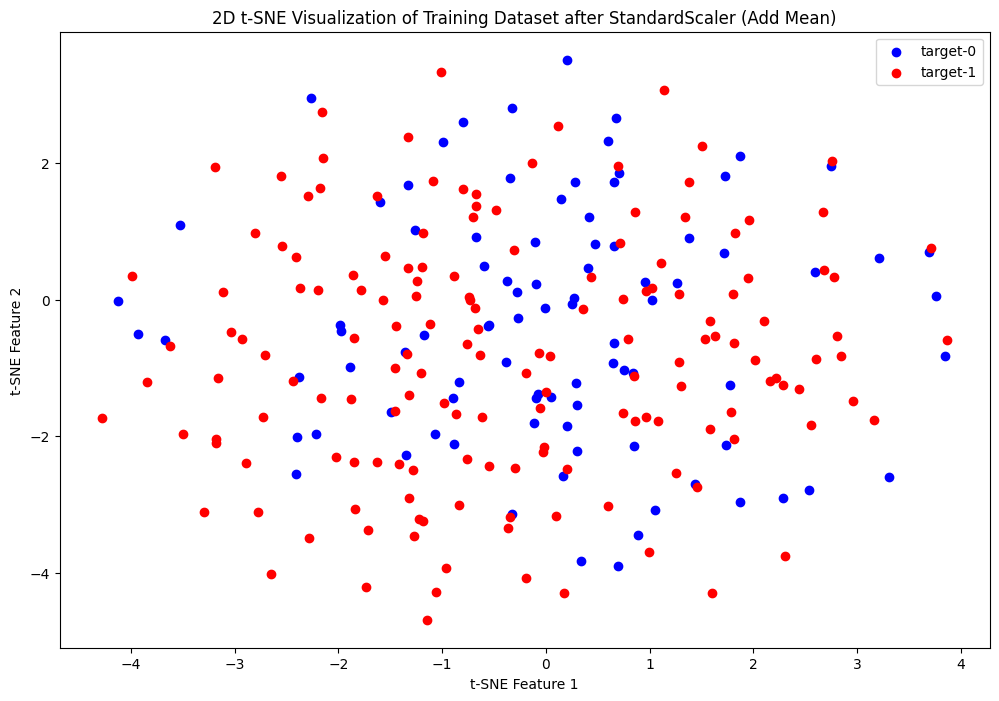

In [39]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train)

plt.figure(figsize=(12, 8))

colors = ['blue', 'red']
labels = ['target-0', 'target-1']

for i in range(2):
    indices = (y == i)
    plt.scatter(X_tsne[indices, 0], X_tsne[indices, 1], c=colors[i], label=labels[i])

plt.title('2D t-SNE Visualization of Training Dataset after StandardScaler (Add Mean)')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.legend()
plt.show()

## 1.3 Adding Mean and Std

In [51]:
train = pd.read_csv('./dataset/dont-overfit-ii/train.csv')
test = pd.read_csv('./dataset/dont-overfit-ii/test.csv')

y = train['target'] 
X = train.drop(["id" ,'target'], axis=1)
test = test.drop(["id"],axis=1)
X_train = X
X_test = test
y_train = y

X_train['300'] = X_train.mean(1)
X_test['300'] = X_test.mean(1)
X_train['301'] = X_train.std(1)
X_test['301'] = X_test.std(1)

scaler = StandardScaler()
X_train[X_train.columns[:-1]] = scaler.fit_transform(X_train[X_train.columns[:-1]])
X_test[X_train.columns[:-1]] = scaler.transform(X_test[X_train.columns[:-1]])
X_train = X_train.values
X_test = X_test.values

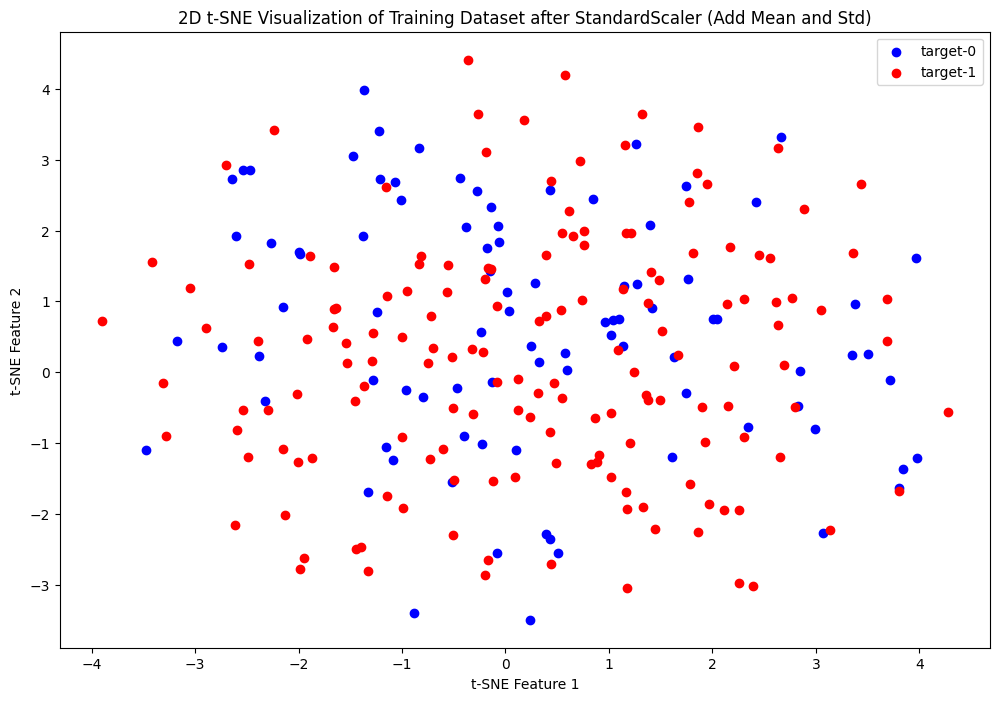

In [27]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train)

plt.figure(figsize=(12, 8))

colors = ['blue', 'red']
labels = ['target-0', 'target-1']

for i in range(2):
    indices = (y == i)
    plt.scatter(X_tsne[indices, 0], X_tsne[indices, 1], c=colors[i], label=labels[i])

plt.title('2D t-SNE Visualization of Training Dataset after StandardScaler (Add Mean and Std)')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.legend()
plt.show()

# 4. Feature Selection

## 1. SelectKBest

In [75]:
# baseline LR model

train = pd.read_csv('./dataset/dont-overfit-ii/train.csv')
test = pd.read_csv('./dataset/dont-overfit-ii/test.csv')

y = train['target'] 
X = train.drop(["id" ,'target'], axis=1)
test = test.drop(["id"],axis=1)

X_train = X
y_train = y
X_test = test

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(class_weight='balanced', penalty='l1', C=0.1, solver='liblinear')
prediction_lr, _ = train_model(X_train, X_test, y_train, params=None, model_type='lasso', model=model)

CV mean roc_auc_scores: 0.6975, std: 0.1144.


In [76]:
scores_dict = {'f_classif': [], 'mutual_info_classif': []}
for i in range(10, 301, 10):
    s1 = SelectKBest(f_classif, k=i)
    X_train1 = s1.fit_transform(X_train, y_train.values.astype(int))
    X_test1 = s1.transform(X_test)
    prediction_lr_1, scores = train_model(X_train1, X_test1, y_train, params=None, model_type='sklearn', model=model)
    scores_dict['f_classif'].append(np.mean(scores))
    
    s2 = SelectKBest(mutual_info_classif, k=i)
    X_train1 = s2.fit_transform(X_train, y_train.values.astype(int))
    X_test1 = s2.transform(X_test)
    prediction_lr_1, scores = train_model(X_train1, X_test1, y_train, params=None, model_type='sklearn', model=model)
    scores_dict['mutual_info_classif'].append(np.mean(scores))
    
data = [go.Scatter(
        x = list(range(10, 301, 10)),
        y = scores_dict['f_classif'],
        name = 'CV scores f_classif'
    ), go.Scatter(
        x = list(range(10, 301, 10)),
        y = scores_dict['mutual_info_classif'],
        name = 'CV scores mutual_info_classif')]
layout = go.Layout(dict(title = "Top N features by SelectKBest vs CV",
                  xaxis = dict(title = 'Top N features by SelectKBest'),
                  yaxis = dict(title = 'CV score'),
                  ))
py.iplot(dict(data=data, layout=layout), filename='basic-line')

CV mean roc_auc_scores: 0.7681, std: 0.0747.
CV mean roc_auc_scores: 0.6881, std: 0.1685.
CV mean roc_auc_scores: 0.7550, std: 0.0942.
CV mean roc_auc_scores: 0.7300, std: 0.1073.
CV mean roc_auc_scores: 0.7625, std: 0.1157.
CV mean roc_auc_scores: 0.7363, std: 0.0870.
CV mean roc_auc_scores: 0.7231, std: 0.1029.
CV mean roc_auc_scores: 0.7256, std: 0.1205.
CV mean roc_auc_scores: 0.7244, std: 0.0991.
CV mean roc_auc_scores: 0.7156, std: 0.1191.
CV mean roc_auc_scores: 0.7131, std: 0.1018.
CV mean roc_auc_scores: 0.7625, std: 0.0928.
CV mean roc_auc_scores: 0.7069, std: 0.1112.
CV mean roc_auc_scores: 0.7544, std: 0.0946.
CV mean roc_auc_scores: 0.7069, std: 0.1112.
CV mean roc_auc_scores: 0.7544, std: 0.0946.
CV mean roc_auc_scores: 0.7069, std: 0.1112.
CV mean roc_auc_scores: 0.7431, std: 0.0996.
CV mean roc_auc_scores: 0.7037, std: 0.1123.
CV mean roc_auc_scores: 0.7431, std: 0.0996.
CV mean roc_auc_scores: 0.7037, std: 0.1123.
CV mean roc_auc_scores: 0.7481, std: 0.0827.
CV mean ro

In [77]:
selector = SelectKBest(f_classif, k=10)
X_train = selector.fit_transform(X_train, y_train.values.astype(int))
X_test = selector.transform(X_test)

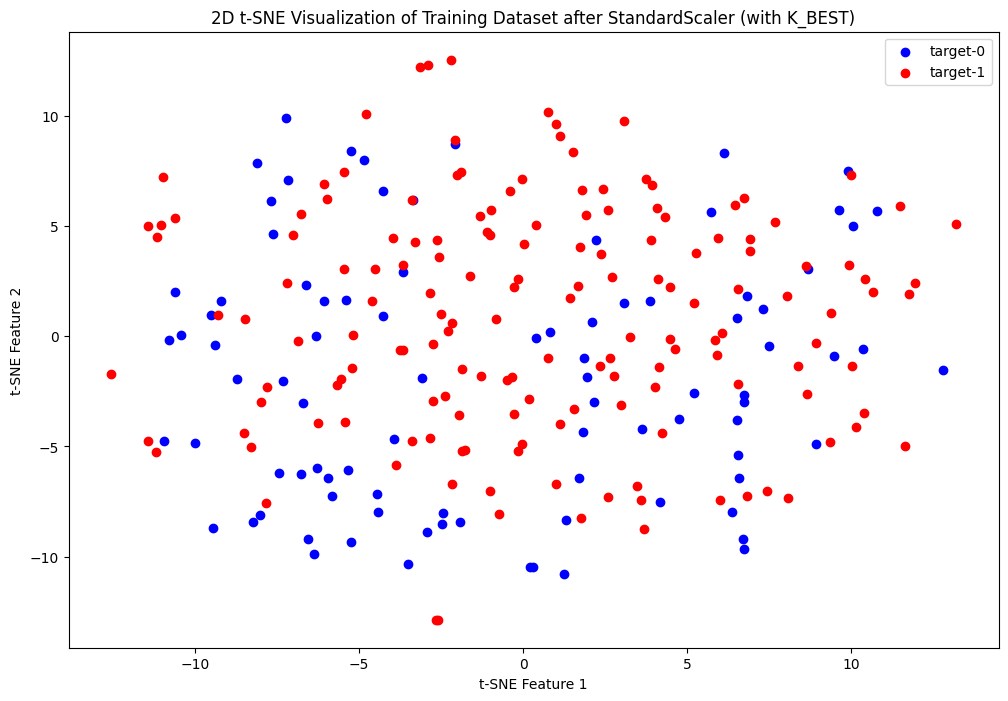

In [78]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train)

plt.figure(figsize=(12, 8))

colors = ['blue', 'red']
labels = ['target-0', 'target-1']

for i in range(2):
    indices = (y == i)
    plt.scatter(X_tsne[indices, 0], X_tsne[indices, 1], c=colors[i], label=labels[i])

plt.title('2D t-SNE Visualization of Training Dataset after StandardScaler (with K_BEST)')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.legend()
plt.show()

## 2. RFE

In [79]:
# baseline LR model

train = pd.read_csv('./dataset/dont-overfit-ii/train.csv')
test = pd.read_csv('./dataset/dont-overfit-ii/test.csv')

y = train['target'] 
X = train.drop(["id" ,'target'], axis=1)
test = test.drop(["id"],axis=1)

X_train = X
y_train = y
X_test = test

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(class_weight='balanced', penalty='l1', C=0.1, solver='liblinear')
prediction_lr, _ = train_model(X_train, X_test, y_train, params=None, model_type='lasso', model=model)

CV mean roc_auc_scores: 0.6975, std: 0.1144.


In [80]:
scores_list = []
for i in range(10, 301, 5):
    s = RFE(model, n_features_to_select=i, step=1)
    X_train1 = s.fit_transform(X_train, y_train.values.astype(int))
    X_test1 = s.transform(X_test)
    prediction_lr_1, scores = train_model(X_train1, X_test1, y_train, params=None, model_type='sklearn', model=model)
    scores_list.append(np.mean(scores))
    
data = [go.Scatter(
        x = list(range(10, 301, 5)),
        y = scores_list,
        name = 'CV scores RFE'
    )]
layout = go.Layout(dict(title = "Top N features by RFE vs CV",
                  xaxis = dict(title = 'Top N features by RFE'),
                  yaxis = dict(title = 'CV score'),
                  ))
py.iplot(dict(data=data, layout=layout), filename='basic-line')


CV mean roc_auc_scores: 0.7612, std: 0.1072.
CV mean roc_auc_scores: 0.7581, std: 0.0820.
CV mean roc_auc_scores: 0.7694, std: 0.1015.
CV mean roc_auc_scores: 0.7512, std: 0.0927.
CV mean roc_auc_scores: 0.7400, std: 0.1017.
CV mean roc_auc_scores: 0.7419, std: 0.0841.
CV mean roc_auc_scores: 0.7225, std: 0.1049.
CV mean roc_auc_scores: 0.7275, std: 0.1118.
CV mean roc_auc_scores: 0.7275, std: 0.1118.
CV mean roc_auc_scores: 0.7275, std: 0.1118.
CV mean roc_auc_scores: 0.7275, std: 0.1118.
CV mean roc_auc_scores: 0.7244, std: 0.1131.
CV mean roc_auc_scores: 0.7244, std: 0.1131.
CV mean roc_auc_scores: 0.7213, std: 0.1132.
CV mean roc_auc_scores: 0.7213, std: 0.1132.
CV mean roc_auc_scores: 0.7150, std: 0.1104.
CV mean roc_auc_scores: 0.7150, std: 0.1104.
CV mean roc_auc_scores: 0.7150, std: 0.1104.
CV mean roc_auc_scores: 0.7119, std: 0.1095.
CV mean roc_auc_scores: 0.7119, std: 0.1095.
CV mean roc_auc_scores: 0.7119, std: 0.1095.
CV mean roc_auc_scores: 0.7119, std: 0.1095.
CV mean ro

In [81]:
selector = RFE(model, n_features_to_select=20, step=1)
X_train = selector.fit_transform(X_train, y_train.values.astype(int))
X_test = selector.transform(X_test)

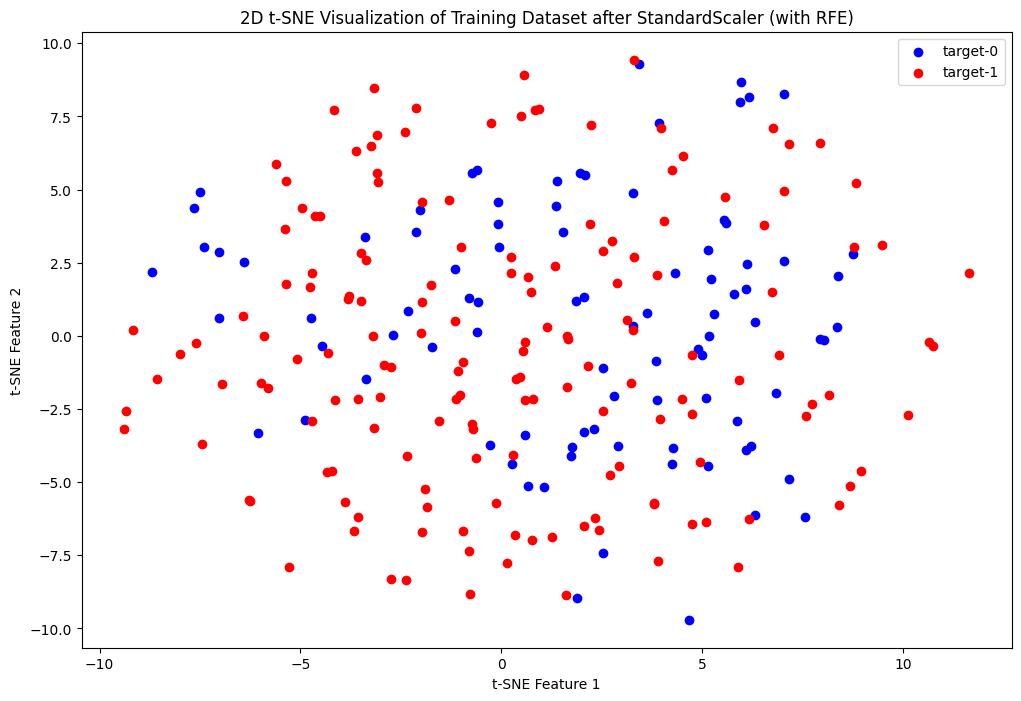

In [82]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train)

plt.figure(figsize=(12, 8))

colors = ['blue', 'red']
labels = ['target-0', 'target-1']

for i in range(2):
    indices = (y == i)
    plt.scatter(X_tsne[indices, 0], X_tsne[indices, 1], c=colors[i], label=labels[i])

plt.title('2D t-SNE Visualization of Training Dataset after StandardScaler (with RFE)')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.legend()
plt.show()

## 3. eli5

In [6]:
# baseline LR model

train = pd.read_csv('./dataset/dont-overfit-ii/train.csv')
test = pd.read_csv('./dataset/dont-overfit-ii/test.csv')

y = train['target'] 
X = train.drop(["id" ,'target'], axis=1)
test = test.drop(["id"],axis=1)

X_train = X
y_train = y
X_test = test

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(class_weight='balanced', penalty='l1', C=0.1, solver='liblinear')
prediction_lr, _ = train_model(X_train, X_test, y_train, params=None, model_type='sklearn', model=model)

eli5_weights = eli5.formatters.as_dataframe.explain_weights_df(model)
eli5_weights['weight'] = eli5_weights['weight'].abs()
eli5_weights = eli5_weights.sort_values('weight', ascending=False)
eli5_weights

train['mean'] = train.mean(1)
train['std'] = train.std(1)
test['mean'] = test.mean(1)
test['std'] = test.std(1)

top_feature_list =  [i[1:] for i in eli5_weights.feature if 'BIAS' not in i]

scores_dict = {'simple': [], 'with_std': [], 'with_mean': [], 'with_mean_std': []}
for i in range(1, eli5_weights.shape[0] + 1):
    top_features = [i[1:] for i in eli5_weights.feature if 'BIAS' not in i][:i]
    
    X_train = train[top_features]
    X_test = test[top_features]
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    prediction_lr, scores = train_model(X_train, X_test, y_train, params=None, model_type='sklearn', model=model, folds=repeated_folds)
    scores_dict['simple'].append(np.mean(scores))
    
    X_train = train[top_features + ['mean']]
    X_test = test[top_features + ['mean']]
    scaler = StandardScaler()
    X_train[X_train.columns[:-1]] = scaler.fit_transform(X_train[X_train.columns[:-1]])
    X_test[X_train.columns[:-1]] = scaler.transform(X_test[X_train.columns[:-1]])
    prediction_lr, scores = train_model(X_train.values, X_test.values, y_train, params=None, model_type='sklearn', model=model, folds=repeated_folds)
    scores_dict['with_mean'].append(np.mean(scores))
    
    X_train = train[top_features + ['std']]
    X_test = test[top_features + ['std']]
    scaler = StandardScaler()
    X_train[X_train.columns[:-1]] = scaler.fit_transform(X_train[X_train.columns[:-1]])
    X_test[X_train.columns[:-1]] = scaler.transform(X_test[X_train.columns[:-1]])
    prediction_lr, scores = train_model(X_train.values, X_test.values, y_train, params=None, model_type='sklearn', model=model, folds=repeated_folds)
    scores_dict['with_std'].append(np.mean(scores))
    
    X_train = train[top_features  + ['mean'] + ['std']]
    X_test = test[top_features + ['mean'] + ['std']]
    scaler = StandardScaler()
    X_train[X_train.columns[:-2]] = scaler.fit_transform(X_train[X_train.columns[:-2]])
    X_test[X_train.columns[:-2]] = scaler.transform(X_test[X_train.columns[:-2]])
    prediction_lr, scores = train_model(X_train.values, X_test.values, y_train, params=None, model_type='sklearn', model=model, folds=repeated_folds)
    scores_dict['with_mean_std'].append(np.mean(scores))
    
data = [go.Scatter(
        x = list(range(1, eli5_weights.shape[0] + 1)),
        y = scores_dict['simple'],
        name = 'Simple CV scores'
    ), go.Scatter(
        x = list(range(1, eli5_weights.shape[0] + 1)),
        y = scores_dict['with_mean'],
        name = 'With mean CV scores'
    ), go.Scatter(
        x = list(range(1, eli5_weights.shape[0] + 1)),
        y = scores_dict['with_std'],
        name = 'With std CV scores'
    ), go.Scatter(
        x = list(range(1, eli5_weights.shape[0] + 2)),
        y = scores_dict['with_mean_std'],
        name = 'With mean & std CV scores'
    )]
layout = go.Layout(dict(title = "Features Selected vs CV score",
                  xaxis = dict(title = 'Top N features'),
                  yaxis = dict(title = 'CV score'),
                  ))
py.iplot(dict(data=data, layout=layout), filename='basic-line')

print(top_feature_list)

CV mean roc_auc_scores: 0.6975, std: 0.1144.
CV mean roc_auc_scores: 0.6807, std: 0.1374.
CV mean roc_auc_scores: 0.6807, std: 0.1374.
CV mean roc_auc_scores: 0.6768, std: 0.1326.
CV mean roc_auc_scores: 0.6768, std: 0.1326.
CV mean roc_auc_scores: 0.7372, std: 0.1272.
CV mean roc_auc_scores: 0.7372, std: 0.1272.
CV mean roc_auc_scores: 0.7308, std: 0.1242.
CV mean roc_auc_scores: 0.7308, std: 0.1242.
CV mean roc_auc_scores: 0.7339, std: 0.1203.
CV mean roc_auc_scores: 0.7339, std: 0.1203.
CV mean roc_auc_scores: 0.7315, std: 0.1195.
CV mean roc_auc_scores: 0.7315, std: 0.1195.
CV mean roc_auc_scores: 0.7373, std: 0.1194.
CV mean roc_auc_scores: 0.7373, std: 0.1194.
CV mean roc_auc_scores: 0.7363, std: 0.1187.
CV mean roc_auc_scores: 0.7363, std: 0.1187.
CV mean roc_auc_scores: 0.7392, std: 0.1233.
CV mean roc_auc_scores: 0.7392, std: 0.1233.
CV mean roc_auc_scores: 0.7391, std: 0.1233.
CV mean roc_auc_scores: 0.7391, std: 0.1233.
CV mean roc_auc_scores: 0.7438, std: 0.1261.
CV mean ro

['33', '65', '217', '91', '73', '199', '43', '117', '16', '194', '295', '298', '189', '258', '80', '127', '133', '226', '108', '183', '276', '252', '101', '24', '165', '82', '237', '272', '58', '63', '201', '17', '39', '90', '134']


### 3.0 Top9 Only

In [73]:
# top 9, repeated CV, only
top_features = [i[1:] for i in eli5_weights.feature if 'BIAS' not in i][:9]

X_train = train[top_features]
X_test = test[top_features]
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = X_train
X_test = X_test

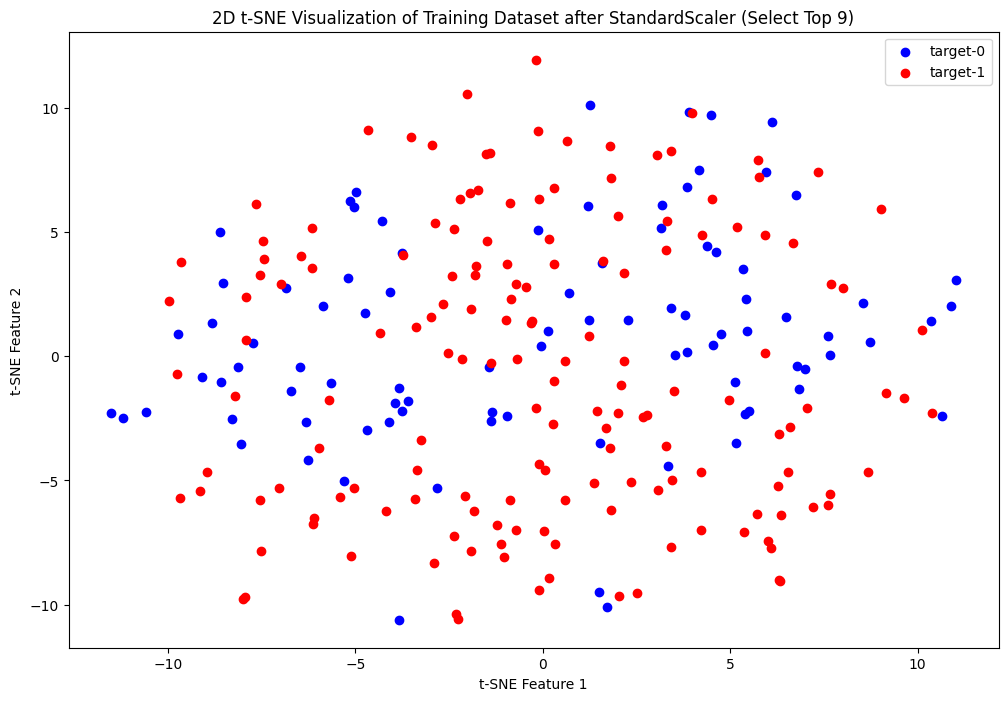

In [55]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train)

plt.figure(figsize=(12, 8))

colors = ['blue', 'red']
labels = ['target-0', 'target-1']

for i in range(2):
    indices = (y == i)
    plt.scatter(X_tsne[indices, 0], X_tsne[indices, 1], c=colors[i], label=labels[i])

plt.title('2D t-SNE Visualization of Training Dataset after StandardScaler (Select Top 9)')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


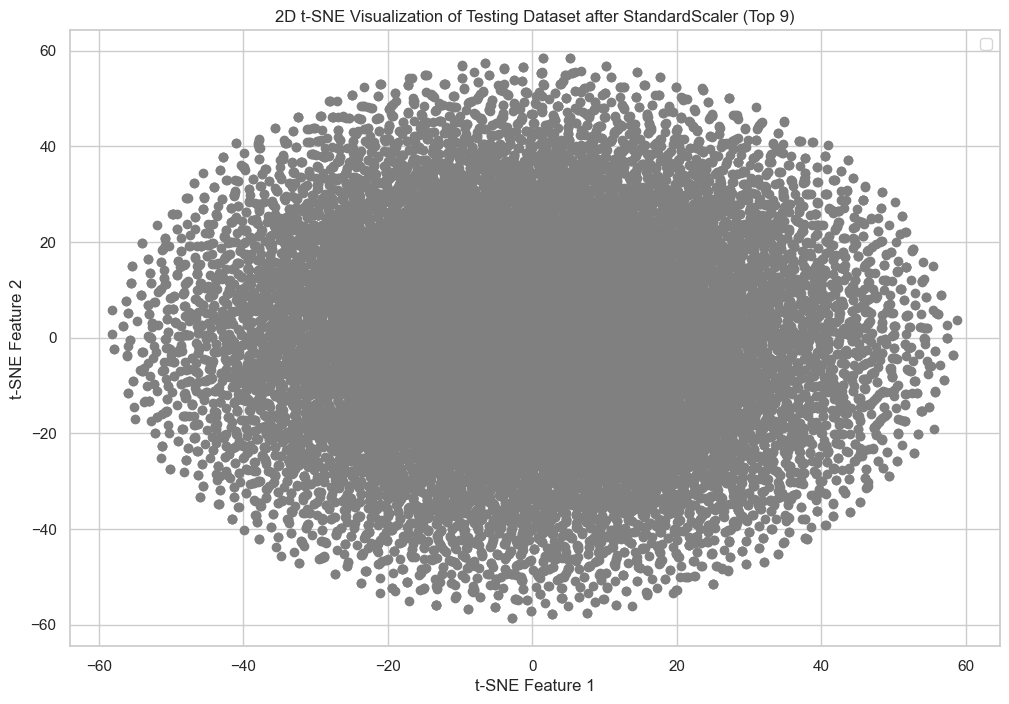

In [39]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_test)

plt.figure(figsize=(12, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c='grey')
plt.title('2D t-SNE Visualization of Testing Dataset after StandardScaler (Top 9)')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.legend()
plt.show()

### 3.1 Top9+Mean

In [18]:
# top 9, repeated CV, with mean
top_features = [i[1:] for i in eli5_weights.feature if 'BIAS' not in i][:9]

X_train = train[top_features + ['mean']]
X_test = test[top_features + ['mean']]
scaler = StandardScaler()
X_train[X_train.columns[:-1]] = scaler.fit_transform(X_train[X_train.columns[:-1]])
X_test[X_train.columns[:-1]] = scaler.transform(X_test[X_train.columns[:-1]])

X_train = X_train.values
X_test = X_test.values

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


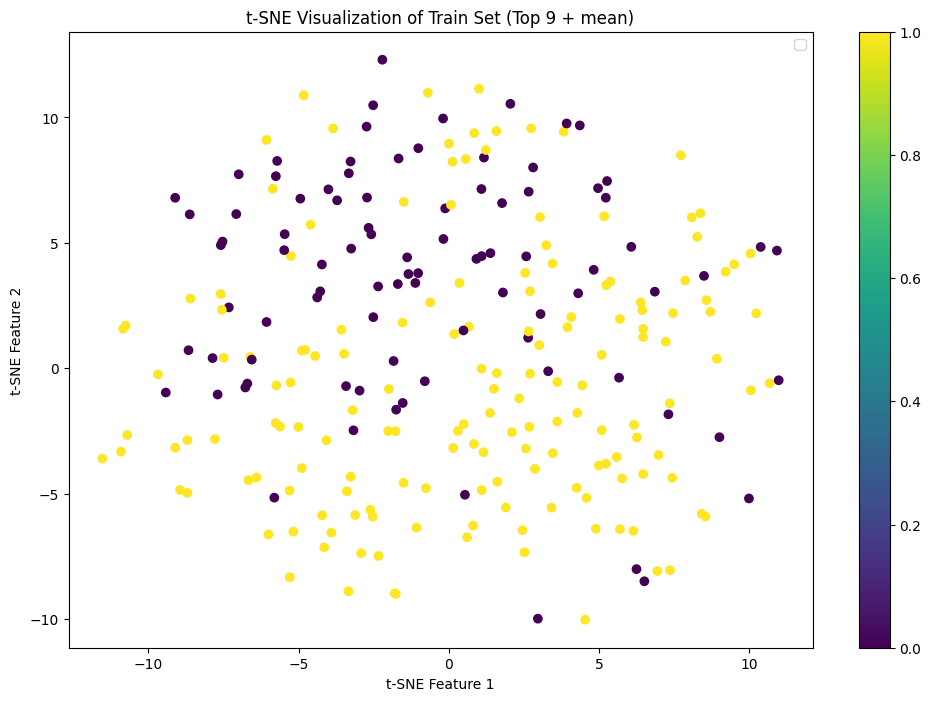

In [54]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train)

plt.figure(figsize=(12, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.colorbar()
plt.title('t-SNE Visualization of Train Set (Top 9 + mean)')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.legend()
plt.show()

### 3.2 Top9+Std

In [21]:
# top 9, repeated CV, with std
top_features = [i[1:] for i in eli5_weights.feature if 'BIAS' not in i][:9]

X_train = train[top_features + ['std']]
X_test = test[top_features + ['std']]
scaler = StandardScaler()
X_train[X_train.columns[:-1]] = scaler.fit_transform(X_train[X_train.columns[:-1]])
X_test[X_train.columns[:-1]] = scaler.transform(X_test[X_train.columns[:-1]])

X_train = X_train.values
X_test = X_test.values

### 3.3 Top9+Mean+Std

In [34]:
# top 9, repeated CV, with mean & std !!
top_features = [i[1:] for i in eli5_weights.feature if 'BIAS' not in i][:9]

X_train = train[top_features + ['mean'] + ['std']]
X_test = test[top_features + ['mean'] + ['std']]
scaler = StandardScaler()
X_train[X_train.columns[:-2]] = scaler.fit_transform(X_train[X_train.columns[:-2]])
X_test[X_train.columns[:-2]] = scaler.transform(X_test[X_train.columns[:-2]])

X_train = X_train.values
X_test = X_test.values

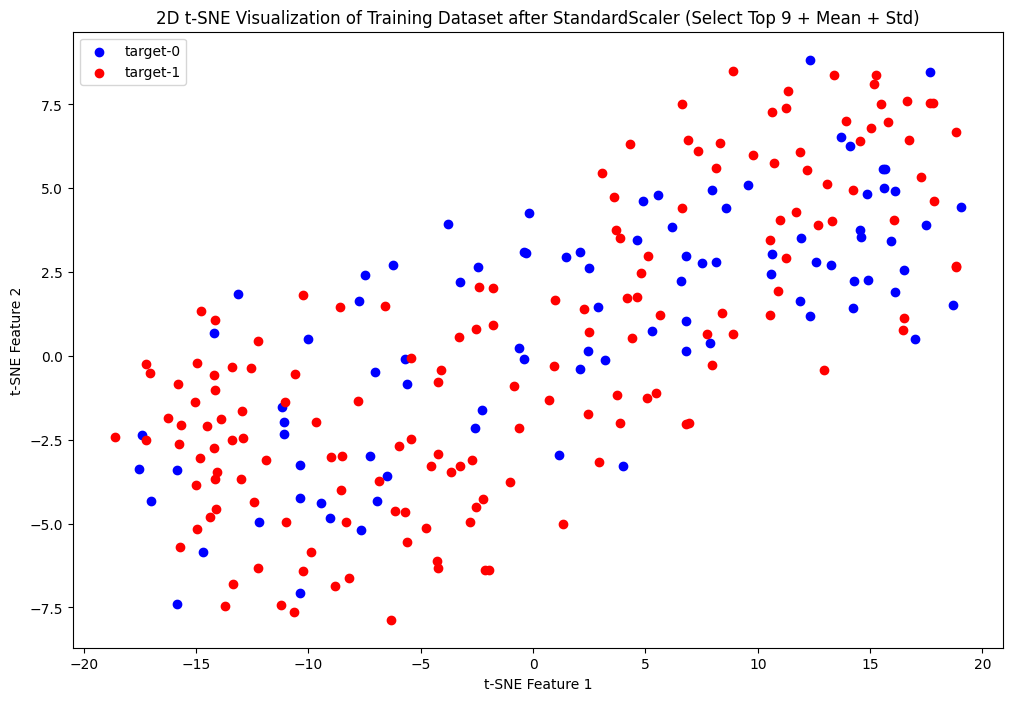

In [52]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train)

plt.figure(figsize=(12, 8))

colors = ['blue', 'red']
labels = ['target-0', 'target-1']

for i in range(2):
    indices = (y == i)
    plt.scatter(X_tsne[indices, 0], X_tsne[indices, 1], c=colors[i], label=labels[i])

plt.title('2D t-SNE Visualization of Training Dataset after StandardScaler (Select Top 9 + Mean + Std)')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


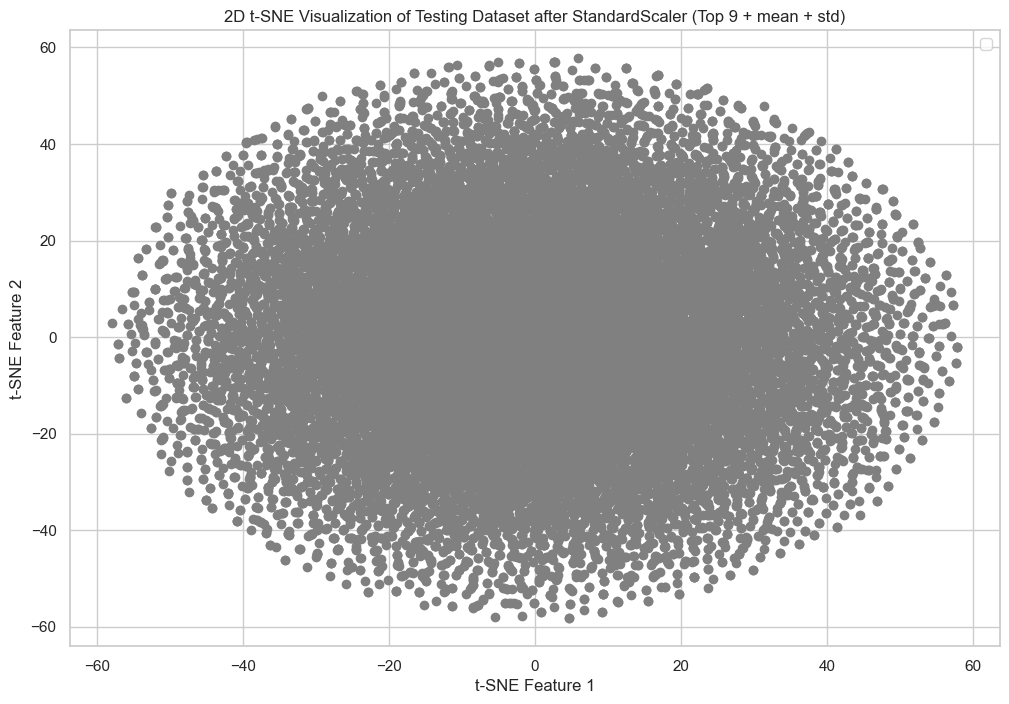

In [36]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_test)

plt.figure(figsize=(12, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c='grey')
plt.title('2D t-SNE Visualization of Testing Dataset after StandardScaler (Top 9 + mean + std)')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.legend()
plt.show()

# 5. Modeling

references:  
https://www.kaggle.com/code/artgor/how-to-not-overfit/

## 1. logistic regression

In [74]:
lr = LogisticRegression(solver='liblinear', max_iter=10000)

parameter_grid = {'class_weight' : ['balanced'],
                  'penalty' : ['l2', 'l1'],
                  'C' : [0.001, 0.01, 0.08, 0.1, 1.0, 10.0, 100.0],
                  'solver': ['liblinear']
                 }

grid_search = GridSearchCV(lr, param_grid=parameter_grid, cv=folds, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.9525
Best parameters: {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}


In [15]:
model = LogisticRegression(**grid_search.best_params_)
prediction_lr, roc_auc_scores_lr = train_model(X_train, X_test, y_train, params=None, model_type='sklearn', model=model)

CV mean roc_auc_scores: 0.8031, std: 0.1180.


## 2. SVC

In [9]:
svc = SVC(probability=True, gamma='scale')

parameter_grid = {'C': [0.001, 0.01, 0.1, 1.0, 10.0],
                  'kernel': ['linear', 'poly', 'rbf'],
                 }

grid_search = GridSearchCV(svc, param_grid=parameter_grid, cv=folds, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))
svc = SVC(probability=True, gamma='scale', **grid_search.best_params_)
prediction_svc, roc_auc_scores_svc = train_model(X_train, X_test, y_train, params=None, model_type='sklearn', model=svc)

Best score: 0.8121875
Best parameters: {'C': 0.01, 'kernel': 'rbf'}
CV mean roc_auc_scores: 0.5000, std: 0.0000.


## 3. kNN

In [10]:
knc = KNeighborsClassifier()

parameter_grid = {'n_neighbors': [2, 3, 5, 10, 20],
                  'weights': ['uniform', 'distance'],
                  'leaf_size': [5, 10, 30]
                 }

grid_search = GridSearchCV(knc, param_grid=parameter_grid, cv=folds, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))
knc = KNeighborsClassifier(**grid_search.best_params_)
prediction_knc, roc_auc_scores_knc = train_model(X_train, X_test, y_train, params=None, model_type='sklearn', model=knc)

Best score: 0.6571874999999999
Best parameters: {'leaf_size': 5, 'n_neighbors': 20, 'weights': 'distance'}
CV mean roc_auc_scores: 0.5588, std: 0.0979.


## 4. Decision Tree

In [11]:
dt = DecisionTreeClassifier(random_state=random_state)

parameter_grid = {'criterion':['gini', 'entropy', 'log_loss'],
                'class_weight':['balanced'],
                  'max_depth':[30,50,60,100],
                  'min_samples_leaf':[2,3,5,10],
                  'min_impurity_decrease':[0.1,0.2,0.5]
                  }

grid_search = GridSearchCV(dt, param_grid=parameter_grid, cv=folds, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))
dt = DecisionTreeClassifier(**grid_search.best_params_)
prediction_dt, roc_auc_scores_dt = train_model(X_train, X_test, y_train, params=None, model_type='sklearn', model=dt)

Best score: 0.5943750000000001
Best parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 30, 'min_impurity_decrease': 0.1, 'min_samples_leaf': 2}
CV mean roc_auc_scores: 0.5944, std: 0.1366.


## 5. RandomForest

In [13]:
rfc = RandomForestClassifier()

parameter_grid = {'n_estimators': [100, 1000],
                  'max_depth': [None, 3, 5, 15],
                  'min_samples_split': [2, 10, 50, 150], # Random in the instances 
                  'max_features': [None, 'sqrt', 'log2'], # Random in the features
                 }

grid_search = GridSearchCV(rfc, param_grid=parameter_grid, cv=folds, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))
rfc = RandomForestClassifier(**grid_search.best_params_)
prediction_rfc, roc_auc_scores_rfc = train_model(X_train, X_test, y_train, params=None, model_type='sklearn', model=rfc)

Best score: 0.7893749999999999
Best parameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 1000}
CV mean roc_auc_scores: 0.5112, std: 0.0340.


## 6. GaussianNB

In [15]:
gnb = GaussianNB()
prediction_gnb, roc_auc_scores_gnb = train_model(X_train, X_test, y_train, params=None, model_type='sklearn', model=gnb)

CV mean roc_auc_scores: 0.6619, std: 0.1014.


## 7. AdaBoost

In [18]:
abc = AdaBoostClassifier()

parameter_grid = {'n_estimators': [5, 10, 20, 50, 100],
                  'learning_rate': [0.001, 0.01, 0.1, 1.0, 10.0]
                 }

grid_search = GridSearchCV(abc, param_grid=parameter_grid, cv=folds, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

abc = AdaBoostClassifier(**grid_search.best_params_)
prediction_abc, roc_auc_scores_abc = train_model(X_train, X_test, y_train, params=None, model_type='sklearn', model=abc)

Best score: 0.7284375
Best parameters: {'learning_rate': 0.1, 'n_estimators': 10}
CV mean roc_auc_scores: 0.5725, std: 0.1374.


## 8. Lasso

In [20]:

lasso = Lasso()

parameter_grid = {
    'alpha': [0.02, 0.03, 0.04],
    'tol': [0.00025, 0.0005, 0.001, 0.002]
}

grid_search = GridSearchCV(lasso, param_grid=parameter_grid, cv=folds, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

lasso = Lasso(**grid_search.best_params_)
prediction_lasso, roc_auc_scores_lasso = train_model(X_train, X_test, y_train, params=None, model_type='lasso', model=lasso)

Best score: 0.81125
Best parameters: {'alpha': 0.04, 'tol': 0.002}
CV mean roc_auc_scores: 0.8113, std: 0.1217.


## 9. SGDClassifier

In [21]:
sgd = SGDClassifier(eta0=1, max_iter=1000, tol=0.0001)

parameter_grid = {'loss': ['log', 'modified_huber'],
                  'penalty': ['l1', 'l2', 'elasticnet'],
                  'alpha': [0.001, 0.01],
                  'l1_ratio': [0, 0.15, 0.5, 1.0],
                  'learning_rate': ['optimal', 'invscaling', 'adaptive']
                 }

grid_search = GridSearchCV(sgd, param_grid=parameter_grid, cv=folds, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))
sgd = SGDClassifier(eta0=1, tol=0.0001, **grid_search.best_params_)
prediction_sgd, roc_auc_scores_sgd = train_model(X_train, X_test, y_train, params=None, model_type='sklearn', model=sgd)

/Users/physics/miniforge3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/Users/physics/miniforge3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/Users/physics/miniforge3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/Users/physics/miniforge3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='l

Best score: 0.8225
Best parameters: {'alpha': 0.01, 'l1_ratio': 1.0, 'learning_rate': 'adaptive', 'loss': 'log', 'penalty': 'elasticnet'}
CV mean roc_auc_scores: 0.6619, std: 0.1321.


In [23]:
prediction_list = {
    'lr': prediction_lr,
    'svc': prediction_svc,
    'knc': prediction_knc,
    'dt': prediction_dt,
    'rfc': prediction_rfc,
    'gnb': prediction_gnb,
    'abc': prediction_abc, 
    'lasso': prediction_lasso,
    'sgd': prediction_sgd
}

# 6. Submission, LB Score

In [24]:
for key, value in prediction_list.items():
    sub = pd.read_csv('./dataset/dont-overfit-ii/sample_submission.csv')
    sub['target'] = value
    sub.to_csv(f'./results/top9_mean_std_all_3/top9_mean_std_all_3_{key}_1.csv', index=False)

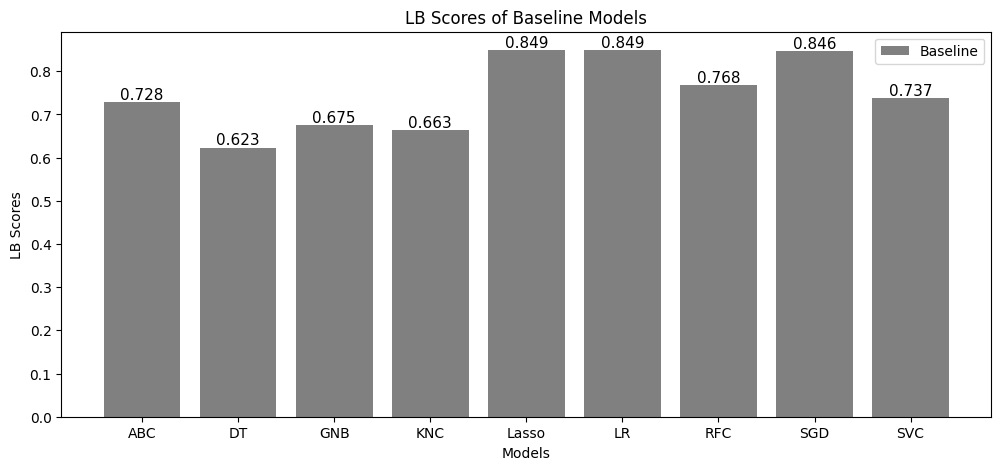

In [13]:
# baseline plot

plt.figure(figsize=(12, 5))

# baseline
scores_df_lb = {}
scores_df_lb['ABC'] = 0.728
scores_df_lb['DT'] = 0.623
scores_df_lb['GNB'] = 0.675
scores_df_lb['KNC'] = 0.663
scores_df_lb['Lasso'] = 0.849
scores_df_lb['LR'] = 0.849
scores_df_lb['RFC'] = 0.768
scores_df_lb['SGD'] = 0.846
scores_df_lb['SVC'] = 0.737

plt.bar(range(len(scores_df_lb)), list(scores_df_lb.values()), label='Baseline', align='center', color='grey')
plt.title('LB Scores of Baseline Models')
plt.xlabel('Models')
plt.ylabel('LB Scores')
plt.xticks(range(len(scores_df_lb)), list(scores_df_lb.keys()))
for a, b in zip(range(len(scores_df_lb)), list(scores_df_lb.values())):
    plt.text(a, b, '%.3f' % b, ha='center', va='bottom', fontsize=11)

plt.legend()
plt.show()

<Figure size 1200x800 with 0 Axes>

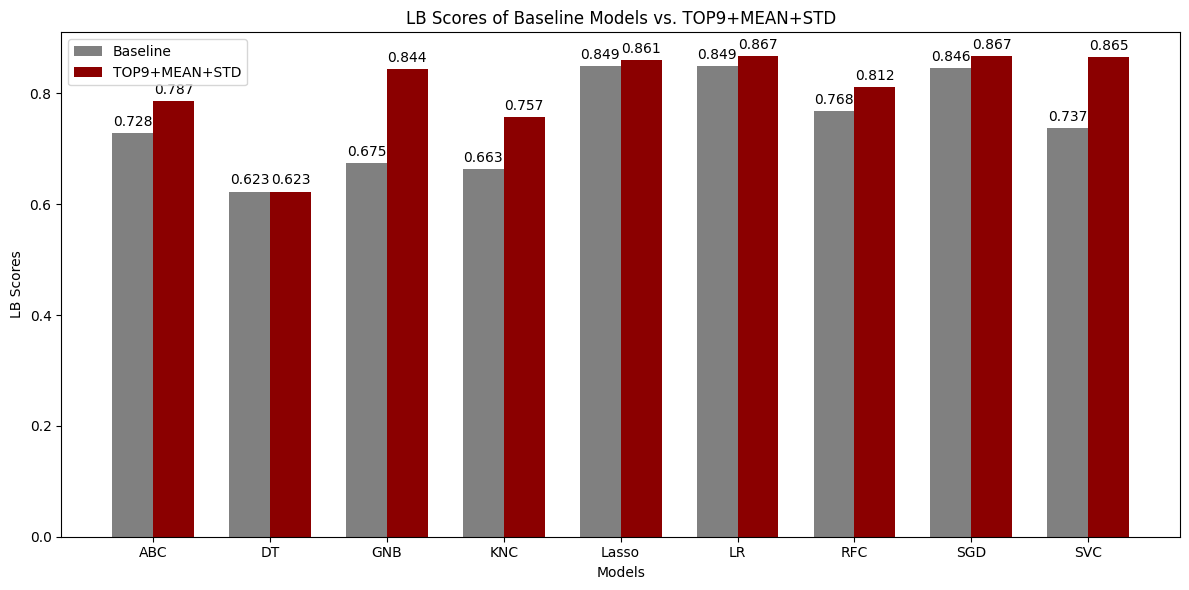

In [19]:
plt.figure(figsize=(12, 8))

# baseline
scores_df_lb = {}
scores_df_lb['ABC'] = 0.728
scores_df_lb['DT'] = 0.623
scores_df_lb['GNB'] = 0.675
scores_df_lb['KNC'] = 0.663
scores_df_lb['Lasso'] = 0.849
scores_df_lb['LR'] = 0.849
scores_df_lb['RFC'] = 0.768
scores_df_lb['SGD'] = 0.846
scores_df_lb['SVC'] = 0.737


method_name = "TOP9+MEAN+STD"

scores_v1 = {
    'ABC': 0.787,
    'DT': 0.623,
    'GNB': 0.844,
    'KNC': 0.757,
    'Lasso': 0.861,
    'LR': 0.867,
    'RFC': 0.812,
    'SGD': 0.867,
    'SVC': 0.865,
}

n_groups = len(scores_df_lb)
index = np.arange(n_groups)
bar_width = 0.35


fig, ax = plt.subplots(figsize=(12, 6))
baseline_bars = ax.bar(index, list(scores_df_lb.values()), bar_width, label='Baseline', color='grey')
v1_bars = ax.bar(index + bar_width, list(scores_v1.values()), bar_width, label=method_name, color='darkred')

ax.set_xlabel('Models')
ax.set_ylabel('LB Scores')
ax.set_title('LB Scores of Baseline Models vs. '+method_name)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(list(scores_df_lb.keys()))
ax.legend()


def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('%.3f' % height,
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

autolabel(baseline_bars)
autolabel(v1_bars)

plt.tight_layout()
plt.show()

## Radar Chart of LB Scores on Each Models and Each Feature Engineering Methods

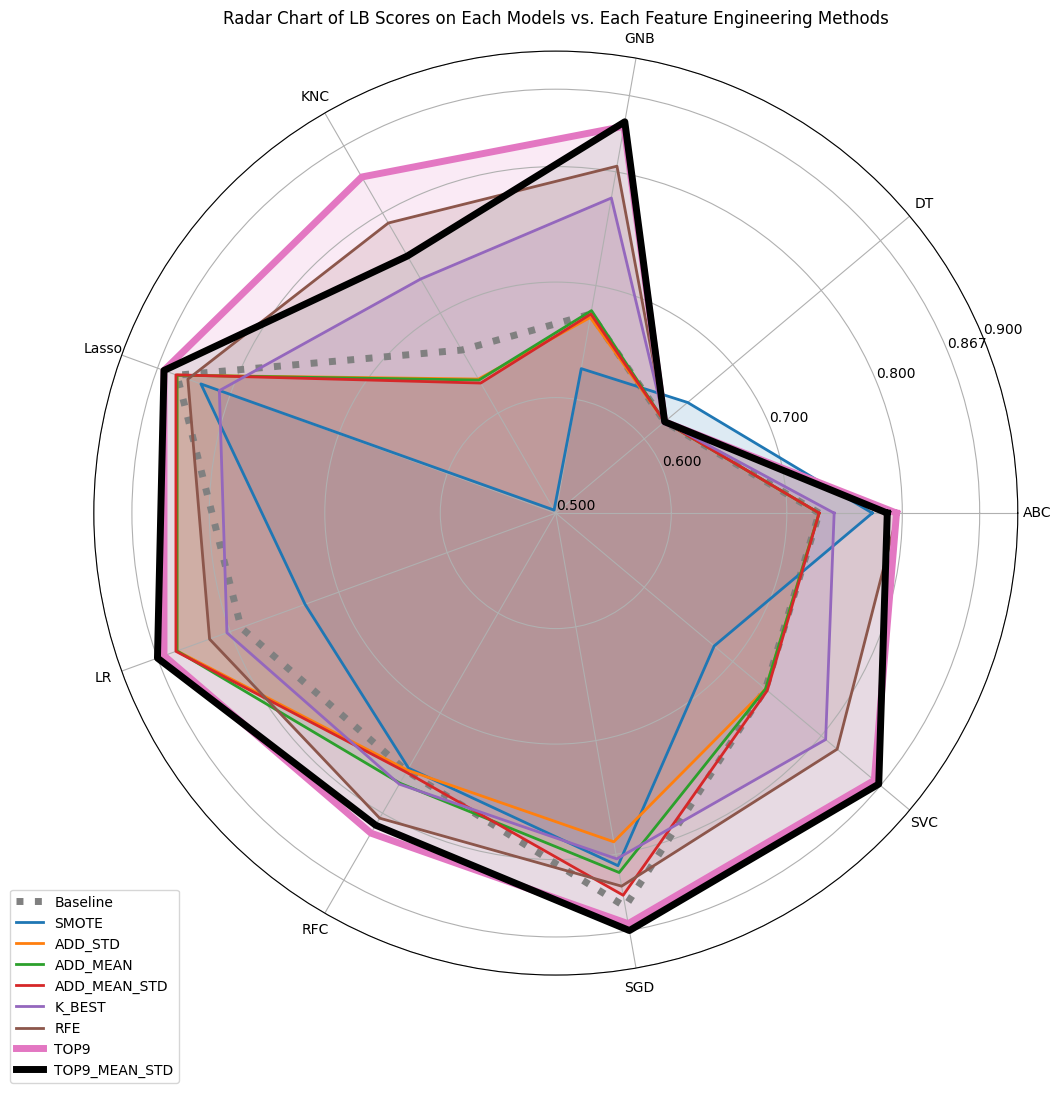

In [69]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi

scores = {
    'Baseline':             [0.728,  0.623,  0.675,  0.663, 0.849, 0.790, 0.758, 0.846, 0.737],
    'SMOTE':                [0.774,  0.649,  0.627,  0.503, 0.827, 0.731, 0.755, 0.810, 0.679],
    'ADD_STD':              [0.728,  0.623,  0.672,  0.634, 0.849, 0.849, 0.757, 0.789, 0.737],
    'ADD_MEAN':             [0.728,  0.623,  0.678,  0.633, 0.849, 0.849, 0.770, 0.816, 0.737],
    'ADD_MEAN_STD':         [0.728,  0.623,  0.675,  0.630, 0.850, 0.850, 0.759, 0.836, 0.739],
    'K_BEST':               [0.741,  0.623,  0.777,  0.734, 0.810, 0.803, 0.771, 0.804, 0.805],
    'RFE':                  [0.796,  0.623,  0.805,  0.790, 0.839, 0.819, 0.805, 0.828, 0.818],
    'TOP9':                 [0.795,  0.623,  0.840,  0.836, 0.861, 0.861, 0.820, 0.861, 0.860],
    'TOP9_MEAN_STD': [0.787,  0.623,  0.844,  0.757, 0.861, 0.867, 0.812, 0.867, 0.865],
}

labels = np.array(['ABC', 'DT', 'GNB', 'KNC', 'Lasso', 'LR', 'RFC', 'SGD', 'SVC'])

num_vars = len(labels)


angles = np.linspace(0, 2 * pi, num_vars, endpoint=False).tolist()
angles += angles[:1]


data = np.array(list(scores.values()))
data = np.concatenate((data, data[:, [0]]), axis=1)


def scale_scores(score):
    return score


scaled_data = np.apply_along_axis(scale_scores, 1, data)

fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(polar=True))


plt.xticks(angles[:-1], labels)


ax.set_rgrids([0.5, 0.6, 0.7, 0.8, 0.867, 0.9])
ax.set_ylim(0.5, 0.9)


for i, (label, d) in enumerate(zip(scores.keys(), scaled_data)):

    if label == 'Baseline':
        linestyle = 'dotted'
        ax.plot(angles, d, linewidth=5, linestyle=linestyle, label=label, color='grey')

    elif label == 'TOP9_MEAN_STD':
        linestyle = 'solid'
        ax.plot(angles, d, linewidth=5, linestyle=linestyle, label=label, color='black')
        ax.fill(angles, d, alpha=0.15)
    elif label == 'TOP9':
        linestyle = 'solid'
        ax.plot(angles, d, linewidth=5, linestyle=linestyle, label=label)
        ax.fill(angles, d, alpha=0.15)
    else:
        linestyle = 'solid'
        ax.plot(angles, d, linewidth=2, linestyle=linestyle, label=label)
        ax.fill(angles, d, alpha=0.15)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title('Radar Chart of LB Scores on Each Models vs. Each Feature Engineering Methods')
plt.show()


## Radar Chart of LB Scores on Each Models and Each Feature Addition Methods

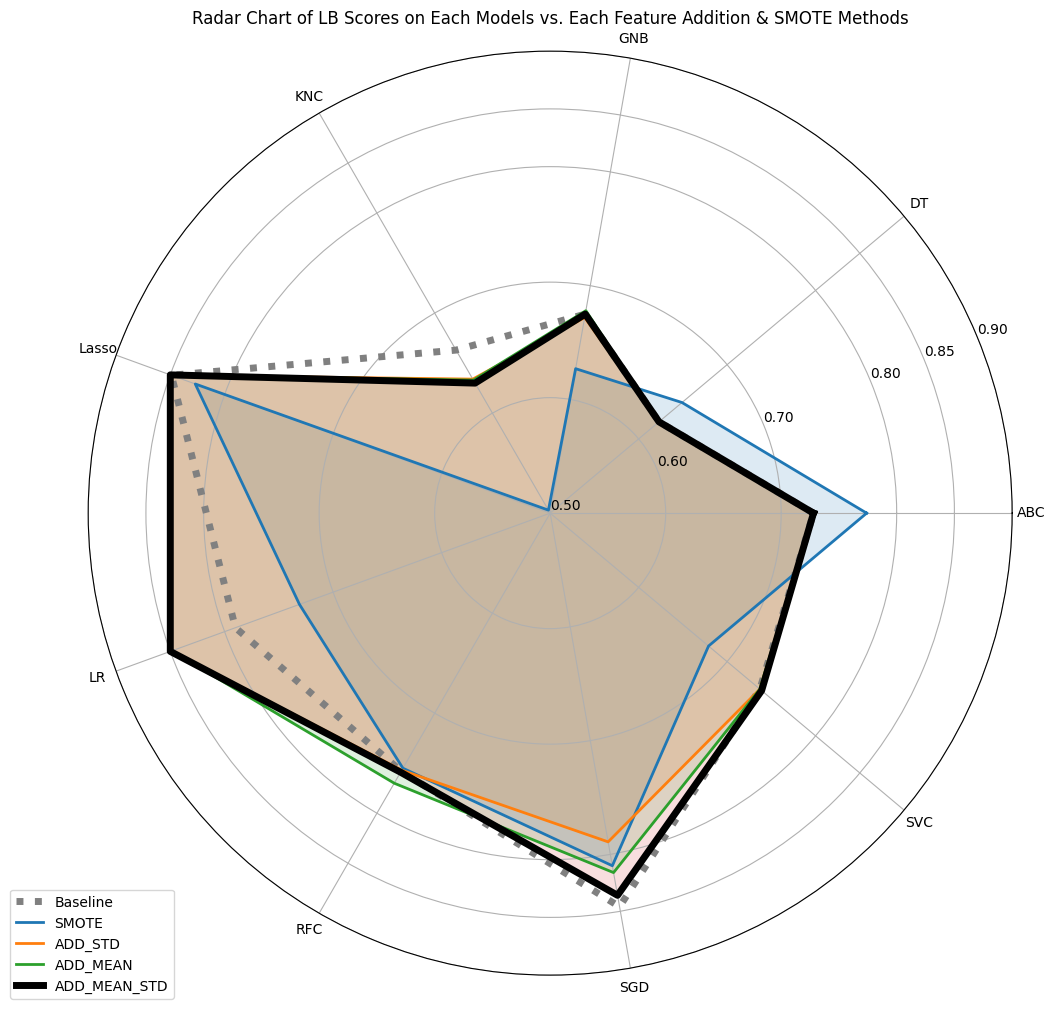

In [70]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi

scores = {
    'Baseline':             [0.728,  0.623,  0.675,  0.663, 0.849, 0.790, 0.758, 0.846, 0.737],
    'SMOTE':                [0.774,  0.649,  0.627,  0.503, 0.827, 0.731, 0.755, 0.810, 0.679],
    'ADD_STD':              [0.728,  0.623,  0.672,  0.634, 0.849, 0.849, 0.757, 0.789, 0.737],
    'ADD_MEAN':             [0.728,  0.623,  0.678,  0.633, 0.849, 0.849, 0.770, 0.816, 0.737],
    'ADD_MEAN_STD':         [0.728,  0.623,  0.675,  0.630, 0.850, 0.850, 0.759, 0.836, 0.739],
}

labels = np.array(['ABC', 'DT', 'GNB', 'KNC', 'Lasso', 'LR', 'RFC', 'SGD', 'SVC'])

num_vars = len(labels)


angles = np.linspace(0, 2 * pi, num_vars, endpoint=False).tolist()
angles += angles[:1] 


data = np.array(list(scores.values()))
data = np.concatenate((data, data[:, [0]]), axis=1)


def scale_scores(score):
    return score

scaled_data = np.apply_along_axis(scale_scores, 1, data)

fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(polar=True))

plt.xticks(angles[:-1], labels)


ax.set_rgrids([0.5, 0.6, 0.7, 0.8, 0.85, 0.9])
ax.set_ylim(0.5, 0.9)


for i, (label, d) in enumerate(zip(scores.keys(), scaled_data)):
    if label == 'Baseline':
        linestyle = 'dotted'
        ax.plot(angles, d, linewidth=5, linestyle=linestyle, label=label, color='grey')

    elif label == 'ADD_MEAN_STD':
        linestyle = 'solid'
        ax.plot(angles, d, linewidth=5, linestyle=linestyle, label=label, color='black')
        ax.fill(angles, d, alpha=0.15)
    else:
        linestyle = 'solid'
        ax.plot(angles, d, linewidth=2, linestyle=linestyle, label=label)
        ax.fill(angles, d, alpha=0.15)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title('Radar Chart of LB Scores on Each Models vs. Each Feature Addition & SMOTE Methods')
plt.show()


## Radar Chart of LB Scores on Each Models and Each Feature Selection Methods

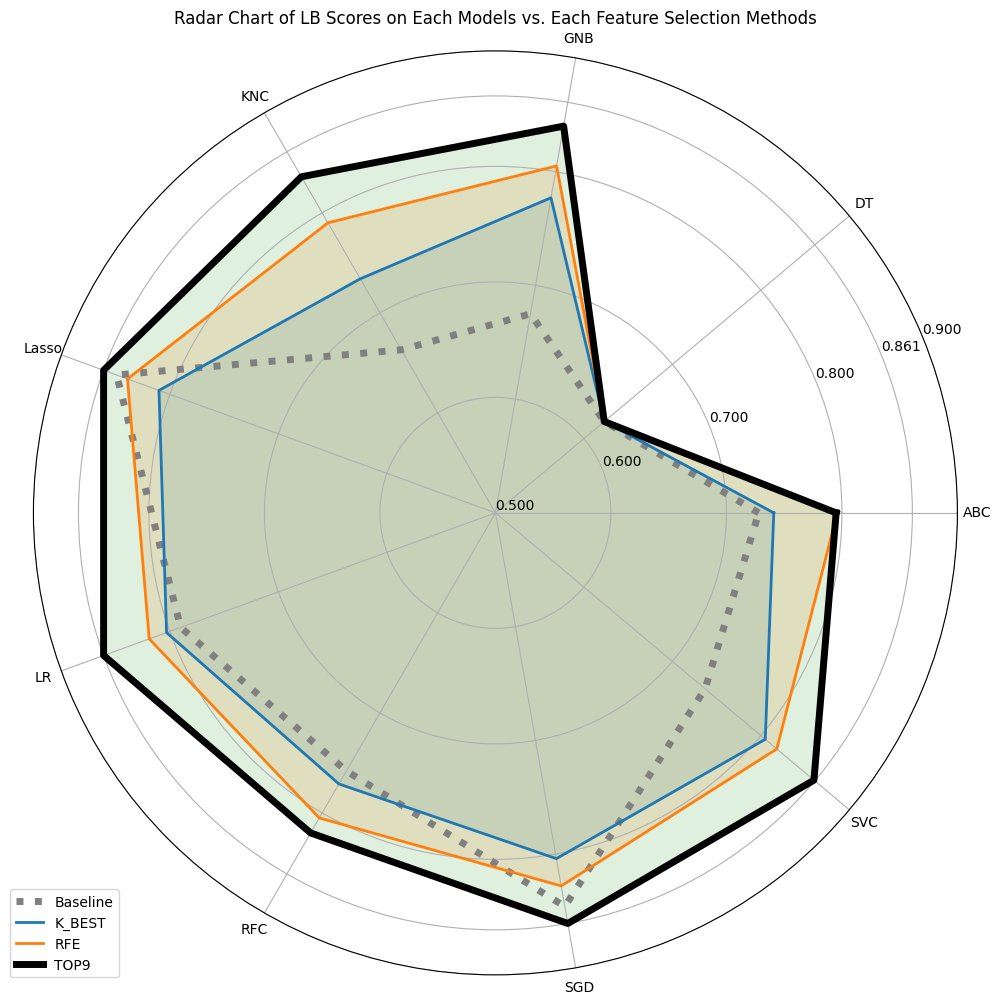

In [71]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi

scores = {
    'Baseline':             [0.728,  0.623,  0.675,  0.663, 0.849, 0.790, 0.758, 0.846, 0.737],
    'K_BEST':               [0.741,  0.623,  0.777,  0.734, 0.810, 0.803, 0.771, 0.804, 0.805],
    'RFE':                  [0.796,  0.623,  0.805,  0.790, 0.839, 0.819, 0.805, 0.828, 0.818],
    'TOP9':                 [0.795,  0.623,  0.840,  0.836, 0.861, 0.861, 0.820, 0.861, 0.860],
}

labels = np.array(['ABC', 'DT', 'GNB', 'KNC', 'Lasso', 'LR', 'RFC', 'SGD', 'SVC'])

num_vars = len(labels)

angles = np.linspace(0, 2 * pi, num_vars, endpoint=False).tolist()
angles += angles[:1]


data = np.array(list(scores.values()))
data = np.concatenate((data, data[:, [0]]), axis=1)


def scale_scores(score):
    return score

scaled_data = np.apply_along_axis(scale_scores, 1, data)

fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(polar=True))

plt.xticks(angles[:-1], labels)

ax.set_rgrids([0.5, 0.6, 0.7, 0.8, 0.861, 0.9])
ax.set_ylim(0.5, 0.9)

for i, (label, d) in enumerate(zip(scores.keys(), scaled_data)):
    if label == 'Baseline':
        linestyle = 'dotted'
        ax.plot(angles, d, linewidth=5, linestyle=linestyle, label=label, color='grey')
    elif label == 'TOP9':
        linestyle = 'solid'
        ax.plot(angles, d, linewidth=5, linestyle=linestyle, label=label, color='black')
        ax.fill(angles, d, alpha=0.15)
    else:
        linestyle = 'solid'
        ax.plot(angles, d, linewidth=2, linestyle=linestyle, label=label)
        ax.fill(angles, d, alpha=0.15)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title('Radar Chart of LB Scores on Each Models vs. Each Feature Selection Methods')
plt.show()


## Radar Chart of LB Scores on Each Models and Feature Selection, Feature Addition Methods, and Feature Sel-Add Fusion Methods

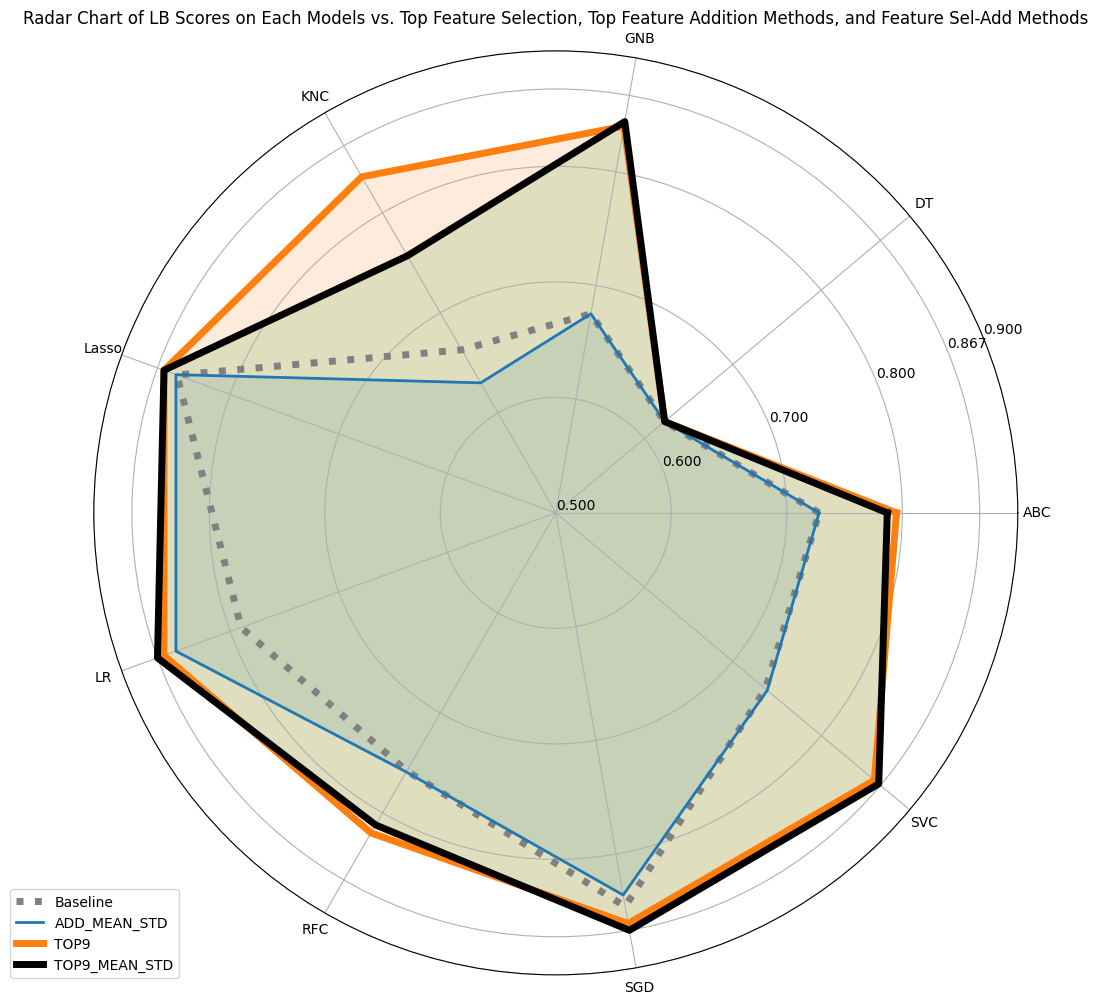

In [72]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi

scores = {
    'Baseline':             [0.728,  0.623,  0.675,  0.663, 0.849, 0.790, 0.758, 0.846, 0.737],
    'ADD_MEAN_STD':         [0.728,  0.623,  0.675,  0.630, 0.850, 0.850, 0.759, 0.836, 0.739],
    'TOP9':                 [0.795,  0.623,  0.840,  0.836, 0.861, 0.861, 0.820, 0.861, 0.860],
    'TOP9_MEAN_STD':        [0.787,  0.623,  0.844,  0.757, 0.861, 0.867, 0.812, 0.867, 0.865],
}

labels = np.array(['ABC', 'DT', 'GNB', 'KNC', 'Lasso', 'LR', 'RFC', 'SGD', 'SVC'])

num_vars = len(labels)

angles = np.linspace(0, 2 * pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

data = np.array(list(scores.values()))
data = np.concatenate((data, data[:, [0]]), axis=1)


def scale_scores(score):
    return score

scaled_data = np.apply_along_axis(scale_scores, 1, data)

fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(polar=True))

plt.xticks(angles[:-1], labels)

ax.set_rgrids([0.5, 0.6, 0.7, 0.8, 0.867, 0.9])
ax.set_ylim(0.5, 0.9)


for i, (label, d) in enumerate(zip(scores.keys(), scaled_data)):
    if label == 'Baseline':
        linestyle = 'dotted'
        ax.plot(angles, d, linewidth=5, linestyle=linestyle, label=label, color='grey')
    elif label == 'TOP9_MEAN_STD':
        linestyle = 'solid'
        ax.plot(angles, d, linewidth=5, linestyle=linestyle, label=label, color='black')
        ax.fill(angles, d, alpha=0.15)
    elif label == 'TOP9':
        linestyle = 'solid'
        ax.plot(angles, d, linewidth=5, linestyle=linestyle, label=label)
        ax.fill(angles, d, alpha=0.15)
    else:
        linestyle = 'solid'
        ax.plot(angles, d, linewidth=2, linestyle=linestyle, label=label)
        ax.fill(angles, d, alpha=0.15)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title('Radar Chart of LB Scores on Each Models vs. Top Feature Selection, Top Feature Addition Methods, and Feature Sel-Add Methods')
plt.show()


# 7. Ablation Study

In [64]:
penalties = ['l1', 'l2']
C_values = [0.01, 0.1, 1.0]
n_folds_options = [2, 10, 20]
results = []

for n_folds in n_folds_options:
    folds = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)
    
    for penalty in penalties:
        for C in C_values:
            model_params = {'penalty': penalty, 'C': C, 'solver': 'liblinear', 'class_weight': 'balanced', 'max_iter': 10000}
            lr_model = LogisticRegression(**model_params)
            
            prediction, roc_auc_scores = train_model(X_train, X_test, y_train, params=None, folds=folds, model_type='sklearn', model=lr_model)
            mean_score = np.mean(roc_auc_scores)
            
            result = {
                'n_folds': n_folds,
                'penalty': penalty,
                'C': C,
                'mean_roc_auc_score': mean_score,
                'predictions': prediction
            }
            results.append(result)
            
            print(f"Processed: folds={n_folds}, penalty={penalty}, C={C}, Mean ROC AUC: {mean_score}")


CV mean roc_auc_scores: 0.5000, std: 0.0000.
Processed: folds=2, penalty=l1, C=0.01, Mean ROC AUC: 0.5
CV mean roc_auc_scores: 0.6910, std: 0.0340.
Processed: folds=2, penalty=l1, C=0.1, Mean ROC AUC: 0.6909722222222223
CV mean roc_auc_scores: 0.8174, std: 0.0049.
Processed: folds=2, penalty=l1, C=1.0, Mean ROC AUC: 0.8173611111111111
CV mean roc_auc_scores: 0.8392, std: 0.0087.
Processed: folds=2, penalty=l2, C=0.01, Mean ROC AUC: 0.8392361111111111
CV mean roc_auc_scores: 0.8486, std: 0.0056.
Processed: folds=2, penalty=l2, C=0.1, Mean ROC AUC: 0.848611111111111
CV mean roc_auc_scores: 0.8538, std: 0.0094.
Processed: folds=2, penalty=l2, C=1.0, Mean ROC AUC: 0.8538194444444444
CV mean roc_auc_scores: 0.5000, std: 0.0000.
Processed: folds=10, penalty=l1, C=0.01, Mean ROC AUC: 0.5
CV mean roc_auc_scores: 0.7108, std: 0.0703.
Processed: folds=10, penalty=l1, C=0.1, Mean ROC AUC: 0.710763888888889
CV mean roc_auc_scores: 0.8299, std: 0.0806.
Processed: folds=10, penalty=l1, C=1.0, Mean R

In [65]:
for item in results:
    sub = pd.read_csv('./dataset/dont-overfit-ii/sample_submission.csv')
    sub['target'] = item['predictions']
    name = f"lr_ablation_{item['n_folds']}_{item['penalty']}_{item['C']}"
    sub.to_csv(f'./results/lr_ablation_top9/{name}_1.csv', index=False)

In [66]:
for item in results:
    name = f"lr_ablation_{item['n_folds']}_{item['penalty']}_{item['C']}"
    print(name)


lr_ablation_2_l1_0.01
lr_ablation_2_l1_0.1
lr_ablation_2_l1_1.0
lr_ablation_2_l2_0.01
lr_ablation_2_l2_0.1
lr_ablation_2_l2_1.0
lr_ablation_10_l1_0.01
lr_ablation_10_l1_0.1
lr_ablation_10_l1_1.0
lr_ablation_10_l2_0.01
lr_ablation_10_l2_0.1
lr_ablation_10_l2_1.0
lr_ablation_20_l1_0.01
lr_ablation_20_l1_0.1
lr_ablation_20_l1_1.0
lr_ablation_20_l2_0.01
lr_ablation_20_l2_0.1
lr_ablation_20_l2_1.0


In [16]:
top9_mean_std_scores = [
    0.5, # 2_l1_0.01
    0.816, # 2_l1_0.1
    0.861, # 2_l1_1.0
    0.861, # 2_l2_0.01
    0.861, # 2_l2_0.1
    0.862, # 2_l2_1.0
    0.5, # 10_l1_0.01
    0.853, # 10_l1_0.1
    0.862, # 10_l1_1.0
    0.861, # 10_l2_0.01
    0.862, # 10_l2_0.1
    0.863, # 10_l2_1.0
    0.5, # 20_l1_0.01
    0.855, # 20_l1_0.1
    0.862, # 20_l1_1.0
    0.861, # 20_l2_0.01
    0.862, # 20_l2_0.1
    0.867, # 20_l2_1.0
]

In [ ]:
mean_std_scores = [
    0.5, # 2_l1_0.01
    0.802, # 2_l1_0.1
    0.791, # 2_l1_1.0
    0.744, # 2_l2_0.01
    0.735, # 2_l2_0.1
    0.728, # 2_l2_1.0
    0.5, # 10_l1_0.01
    0.85, # 10_l1_0.1
    0.825, # 10_l1_1.0
    0.749, # 10_l2_0.01
    0.744, # 10_l2_0.1
    0.740, # 10_l2_1.0
    0.5, # 20_l1_0.01
    0.85, # 20_l1_0.1
    0.825, # 20_l1_1.0
    0.749, # 20_l2_0.01
    0.743, # 20_l2_0.1
    0.737, # 20_l2_1.0
]

In [ ]:
top9_scores = [
    0.50, # 2_l1_0.01
    0.812, # 2_l1_0.1
    0.832, # 2_l1_1.0
    0.797, # 2_l2_0.01
    0.813, # 2_l2_0.1
    0.819, # 2_l2_1.0
    0.5, # 10_l1_0.01
    0.848, # 10_l1_0.1
    0.83, # 10_l1_1.0
    0.799, # 10_l2_0.01
    0.816, # 10_l2_0.1
    0.825, # 10_l2_1.0
    0.5, # 20_l1_0.01
    0.849, # 20_l1_0.1
    0.831, # 20_l1_1.0
    0.8, # 20_l2_0.01
    0.817, # 20_l2_0.1
    0.826, # 20_l2_1.0
]

# 8. ARM

Takes around 6 hours to run the ARM.

In [ ]:
import pandas as pd
from apyori import apriori
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler

data_rule_mining = pd.read_csv('./dataset/dont-overfit-ii/train.csv')
data_rule_mining = data_rule_mining.drop(["id"],axis=1)

standard_scaler = StandardScaler()
data_rule_mining[data_rule_mining.columns[1:]] = standard_scaler.fit_transform(data_rule_mining[data_rule_mining.columns[1:]])

for i in range(300):
    idx = str(i)
    data_rule_mining[idx] = pd.cut(data_rule_mining[idx], 3)
    data_rule_mining[idx] = idx+data_rule_mining[idx].astype(str)
    
for i in ['target']:
    data_rule_mining[i] = pd.cut(data_rule_mining[i], bins=[-0.5,0.5, 1.5],
                    labels=[i+"-0", i+"-1"])

with tqdm(total=100) as pbar:
    pbar.set_description('Processing:')
    pbar.update(0)
    
    # create the tranactions list
    transactions = []
    for i in range(0, len(data_rule_mining)):
        transactions.append([str(data_rule_mining.values[i, j]) for j in range(0, 300)])
    
    pbar.update(33)

    rules = apriori(transactions,min_support=0.25,min_confidence = 0.7,min_length = 3)
    results = list(rules)
    
    pbar.update(33)

    rules_data = []

    for rule in results:
        for ordered_statistic in rule.ordered_statistics:
            if 'target-0' in str(ordered_statistic.items_add) or 'target-1' in str(ordered_statistic.items_add):
                rules_data.append({
                    'rule': str(ordered_statistic.items_base) + " -> " + str(ordered_statistic.items_add),
                    'support': rule.support,
                    'confidence': ordered_statistic.confidence
                })
                
    pbar.update(33)

rules_df = pd.DataFrame(rules_data)
rules_df.sort_values(by=['support'], ascending=False, inplace=True)

rules_df.to_csv('arm_result.csv', index=False)

pd.set_option('display.max_colwidth', None)
print(rules_df.head(10))